In [126]:
%load_ext autoreload

In [208]:
%autoreload 2
%aimport sog1_helpers
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy.stats import pearsonr

# Ignore all warnings
warnings.filterwarnings('ignore')

# What are the differences between Jordan and Emily's scores?

## 1. Loading in scores and merging

In [86]:
js_activities = pd.read_csv("../data/Sog1_library2_activities_with_reads.csv")
ec_activities = pd.read_csv("../data/Sog1_library2_activities_with_reads_ECspike.csv")
#activities = pd.read_csv("../data/Sog1_library2_activities_with_reads_EC.csv")

In [87]:
js_activities

ArrayDNA  Activity_GFP8  \
0      GAAGATCCAACTTGGTTTGATTCTGGTTCTCAATTTATCTTAAATT...     636.156202   
1      GAAGCTTTGTCTTTGTGTGATGATTTGTTGGGTGATCAAGATAGAG...     602.696194   
2      GATTTGGCTGAAGATGATGAAGTTATGTGTATGGAAGATGAAGTTC...     381.502348   
3      GGTCAAAGGAAGAGAAGGAAGATTACTCCAACTTTGGTTAATGATG...     347.155741   
4      TCTGAATTGACTTCTACTTTGGGTATTTCTCATAGATTGCCACAAT...     437.694050   
...                                                  ...            ...   
10304  TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...            NaN   
10305  GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...            NaN   
10306  ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...            NaN   
10307  GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...            NaN   
10308  TATGATTTGGTTAATAAACAAGATGAAGATCCTAAGAATGATATGT...            NaN   

       Activity_S3_1  Activity_S3_2  reads_S3_1  reads_S3_2  \
0         614.613867     944.856101      6448.0       115.0   
1         541.936177     992.565641     10829.0      1680.0   
2         390.255889     390.758385     91062.0       892.0   
3         430.848450     865.176167     13900.0       140.0   
4         470.823534    3562.821795     10128.0       246.0   
...              ...            ...         ...         ...   
10304            NaN    3570.989020         NaN        11.0   
10305            NaN    3330.752810         NaN        13.0   
10306            NaN    5347.917675         NaN        11.0   
10307            NaN    5545.836977         NaN        21.0   
10308            NaN    5678.848247         NaN        17.0   

                                          AAseq     lib2_avg     lib2_std  
0      EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN   779.734984   233.516523  
1      EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE   767.250909   318.643150  
2      DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK   390.507137     0.355319  
3      GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK   648.012309   307.116074  
4      SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL  2016.822664  2186.372938  
...                                         ...          ...          ...  
10304  LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS  3570.989020          NaN  
10305  EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN  3330.752810          NaN  
10306  TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV  5347.917675          NaN  
10307  DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF  5545.836977          NaN  
10308  YDLVNKQDEDPKNDMLPNSNLSSSQQFIKPSMILSDNASV  5678.848247          NaN  

[10309 rows x 9 columns]

In [88]:
ec_activities

ArrayDNA  Activity_S3_1  \
0      AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...    1079.074274   
1      AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...    1394.076068   
2      AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...    1371.861742   
3      AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...     283.663233   
4      AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...    4076.691936   
...                                                  ...            ...   
11264  TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGT...    2314.792506   
11265  TTTGATTGGGAACCAACTGATTCTGGTTCTCAATTTATCTTAAATT...    4433.599889   
11266  TTTGCTGCTGGTGCTAGGAAGAGAAGGAAGATTCATGATGATGACT...    1673.484641   
11267  TTTGTTAAAGATTCTTTGCAAGATATTGGTAAATACTTTGAAATTG...    1780.391373   
11268  TTTGTTGCTTCTCAATTGATGTCTCAAGAAGATGGTGTTTCTGGAT...     353.480826   

       Activity_S3_2  reads_S3_1  reads_S3_2  \
0         925.703811       610.0       643.0   
1        1424.548173     44354.0     36001.0   
2        1170.193129        68.0        38.0   
3         267.611412      5090.0      7330.0   
4        3163.539743       172.0       137.0   
...              ...         ...         ...   
11264    2111.813429       124.0       121.0   
11265    4873.732571      6379.0      8831.0   
11266    1569.322449       816.0       769.0   
11267    2360.015854        75.0        73.0   
11268     313.050935     20451.0     22188.0   

                                          AAseq     lib2_avg    lib2_std  
0      KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL  1002.389042  108.449295  
1      KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1409.312120   21.547032  
2      KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM  1271.027436  142.601244  
3      KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP   275.637323   11.350351  
4      KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD  3620.115839  645.696108  
...                                         ...          ...         ...  
11264  FDSPDVAESFETSPLFANADADLAGQDAWFSLFPSISGGE  2213.302968  143.527882  
11265  FDWEPTDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN  4653.666230  311.220804  
11266  FAAGARKRRKIHDDDFGDVRWHKAGRAKPVVLDGVQRGCK  1621.403545   73.653793  
11267  FVKDSLQDIGKYFEIDSTLDELEQVESGEGNDDLPDEEER  2070.203613  409.856401  
11268  FVASQLMSQEDGVSGFGGHHEEDNNKIGHYNNEESNNKGS   333.265881   28.588250  

[11269 rows x 8 columns]

In [89]:
both = pd.merge(js_activities, ec_activities, on = "ArrayDNA", suffixes = ("_js", "_ec"))
both

ArrayDNA  Activity_GFP8  \
0     ATTATTTGGCATTTGTTGGCTAAATCTGGTTTGTCTGGTTTGTCTT...     451.955540   
1     CCATCTGATTATGTTTCTGCTCATGAAGTTTCTTTGGCTGAAACTT...     423.885353   
2     GATTCTCATATTGCTTCTGATTATGTTACTCCATCTGATTATGTTT...     546.055903   
3     CAATTTATCTTAAATTCTCAACAATTGGTTGAAGCTTTGTCTTTGT...     504.125469   
4     TCTTTGGCTGAAACTTCTGAAGTTATGTGTATGGAAGATGAAGTTC...     383.458535   
...                                                 ...            ...   
9245  TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...            NaN   
9246  GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...            NaN   
9247  ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...            NaN   
9248  GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...            NaN   
9249  TATGATTTGGTTAATAAACAAGATGAAGATCCTAAGAATGATATGT...            NaN   

      Activity_S3_1_js  Activity_S3_2_js  reads_S3_1_js  reads_S3_2_js  \
0           553.464718        495.706275        12342.0         3089.0   
1           551.450656        764.304915        16211.0         1899.0   
2           544.271657        748.858276        21461.0         1105.0   
3           525.528897        922.926861         4034.0           86.0   
4           489.352841       1398.678654         3555.0          178.0   
...                ...               ...            ...            ...   
9245               NaN       3570.989020            NaN           11.0   
9246               NaN       3330.752810            NaN           13.0   
9247               NaN       5347.917675            NaN           11.0   
9248               NaN       5545.836977            NaN           21.0   
9249               NaN       5678.848247            NaN           17.0   

                                      AAseq_js  lib2_avg_js  lib2_std_js  \
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   524.585497    40.841386   
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   657.877786   150.510690   
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP   646.564966   144.664585   
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC   724.227879   281.002795   
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK   944.015747   642.990448   
...                                        ...          ...          ...   
9245  LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS  3570.989020          NaN   
9246  EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN  3330.752810          NaN   
9247  TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV  5347.917675          NaN   
9248  DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF  5545.836977          NaN   
9249  YDLVNKQDEDPKNDMLPNSNLSSSQQFIKPSMILSDNASV  5678.848247          NaN   

      Activity_S3_1_ec  Activity_S3_2_ec  reads_S3_1_ec  reads_S3_2_ec  \
0           444.761592        369.638636        21291.0        27676.0   
1           749.687642        716.012754        17170.0        20078.0   
2          1205.673067        921.201730           80.0           88.0   
3          1516.022615       1985.812713           34.0           33.0   
4          3495.779407       3769.355633          228.0          189.0   
...                ...               ...            ...            ...   
9245       3740.123701       3447.077589           84.0           73.0   
9246       3638.512152       3078.099946          102.0          111.0   
9247       2346.224267       1195.355529           12.0           18.0   
9248       3816.517233       3820.398149           56.0           72.0   
9249       2279.369792       2450.541273          101.0          105.0   

                                      AAseq_ec  lib2_avg_ec  lib2_std_ec  
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   407.200114    53.119951  
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   732.850198    23.811742  
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP  1063.437398   201.151612  
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC  1750.917664   332.191764  
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK  3632.567520   193.447605  
...              

## 2. Comparing activity measurements

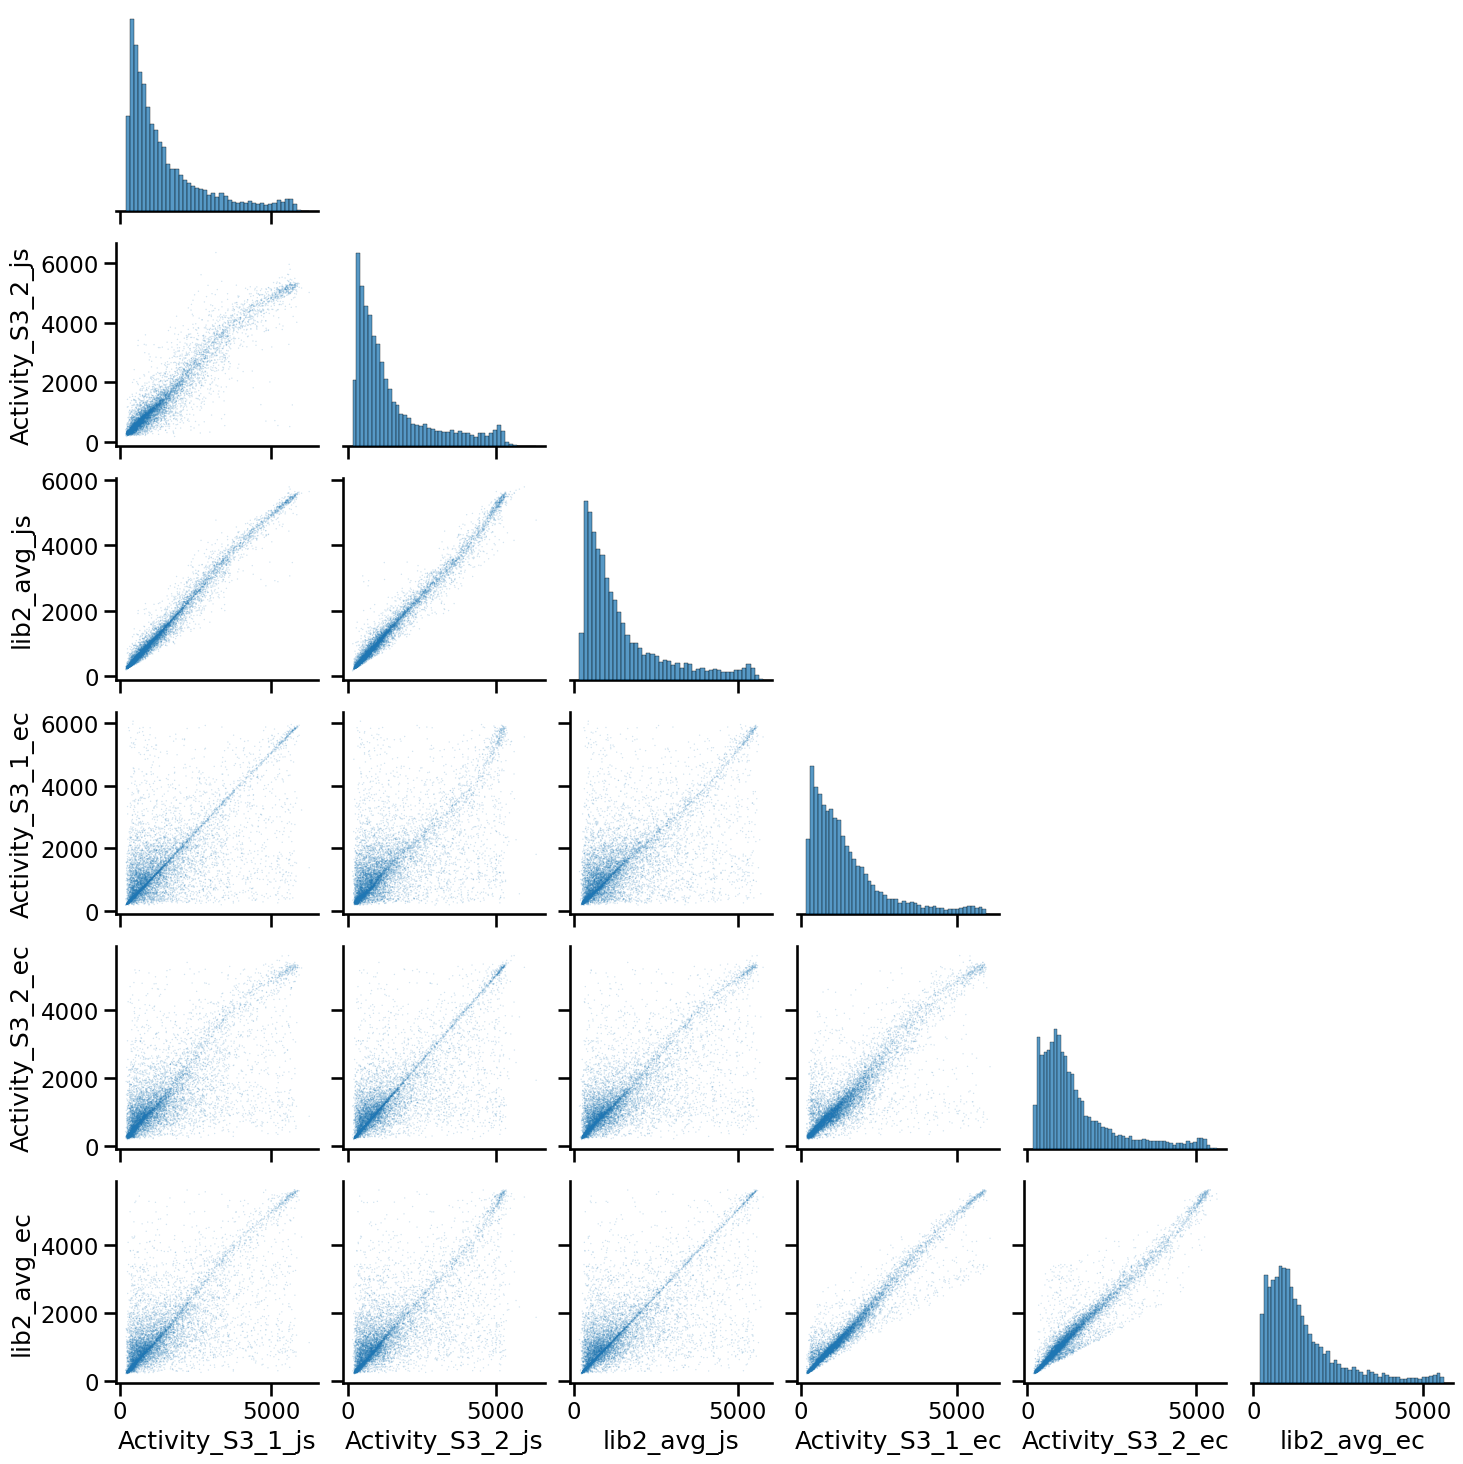

In [90]:
sns.set_context('talk')
sns.pairplot(both[["Activity_S3_1_js", "Activity_S3_2_js", "lib2_avg_js",
                   "Activity_S3_1_ec", "Activity_S3_2_ec", "lib2_avg_ec"]], 
             plot_kws = {'s' : 1, 'edgecolor' : 'none', 'alpha' : 0.2}, corner = True,)

In [160]:
def plot_correl(x, y, data = both, s = 4, alpha = 0.1, text_x = 6000, text_y = 300):
    sns.set_context('talk')
    df = data.dropna(subset = [x, y])
    sns.scatterplot(data = df, x = x, y = y, s = s, alpha = alpha, edgecolor = 'none')
    plt.text(x = text_x, y = text_y, 
             s = "Pearson\ncorrelation:\n" + str(pearsonr(x = df[x], y = df[y])[0])[:5],
            ha = "center", color = "red")
    sns.despine()

Text(0.5, 1.0, 'All Overlapping Tiles')

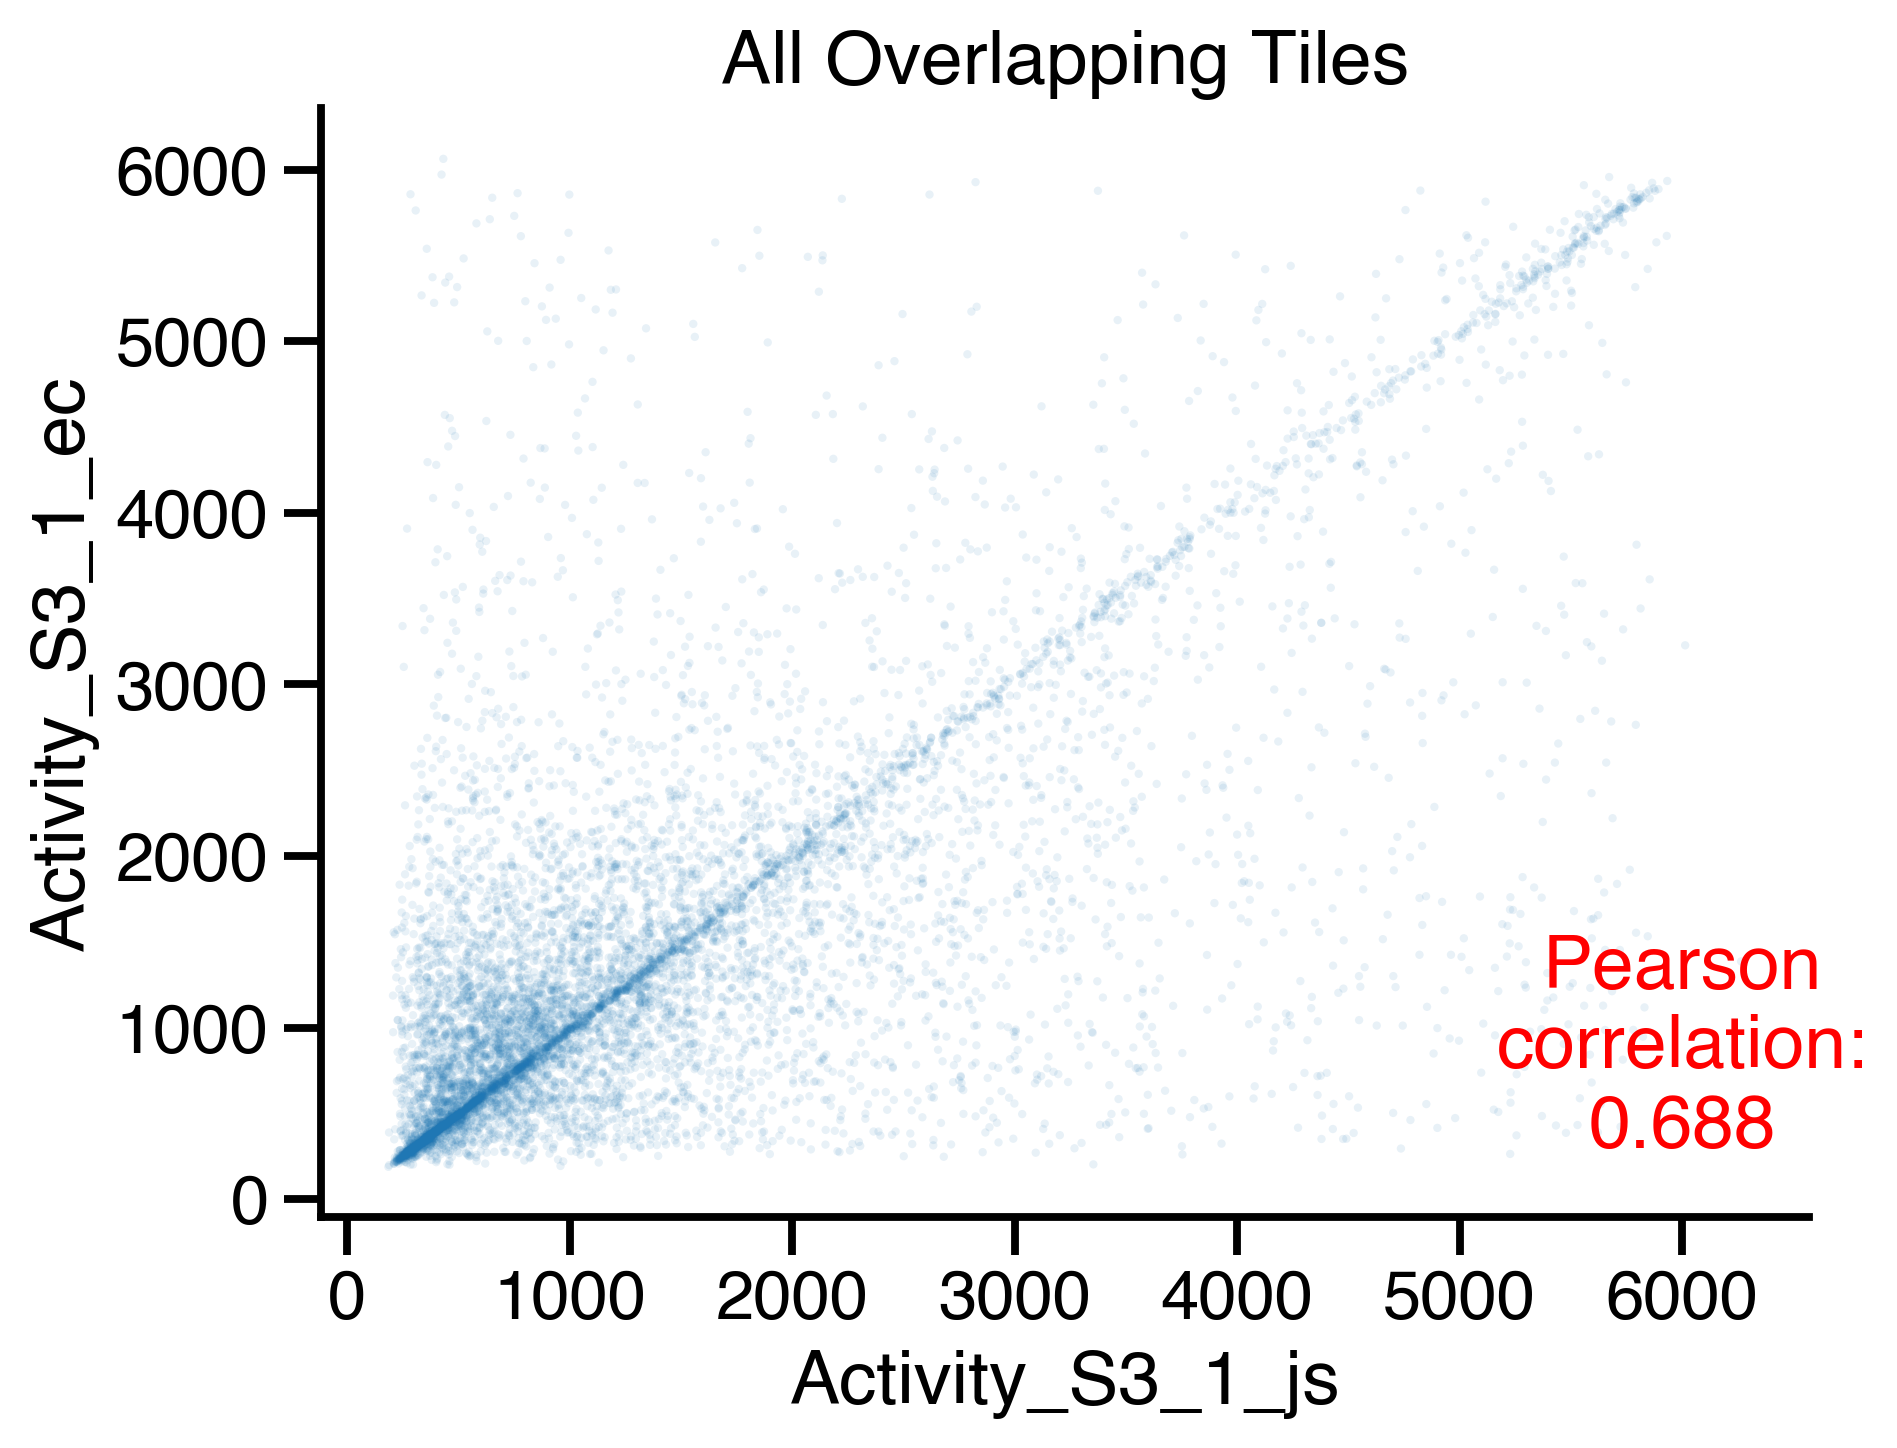

In [189]:
plt.figure(dpi = 300)
plot_correl("Activity_S3_1_js", "Activity_S3_1_ec")
plt.title("All Overlapping Tiles")

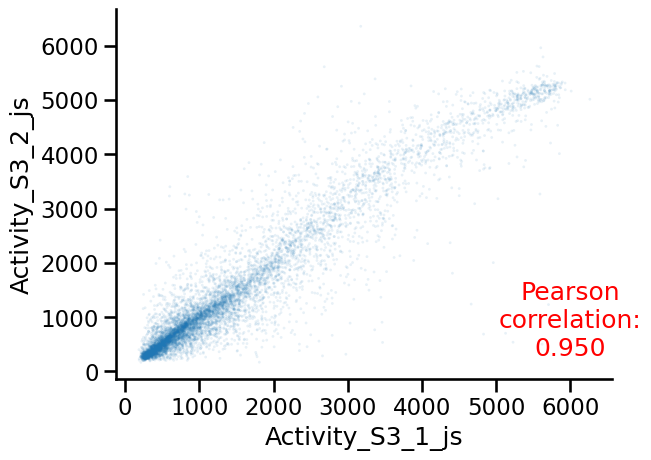

In [93]:
plot_correl("Activity_S3_1_js", "Activity_S3_2_js")

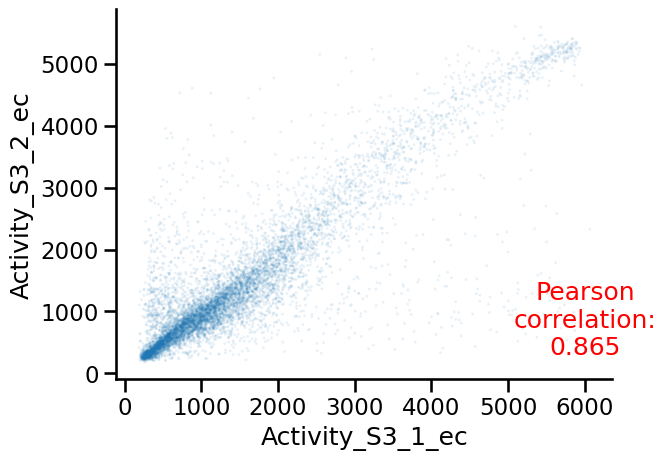

In [94]:
plot_correl("Activity_S3_1_ec", "Activity_S3_2_ec")

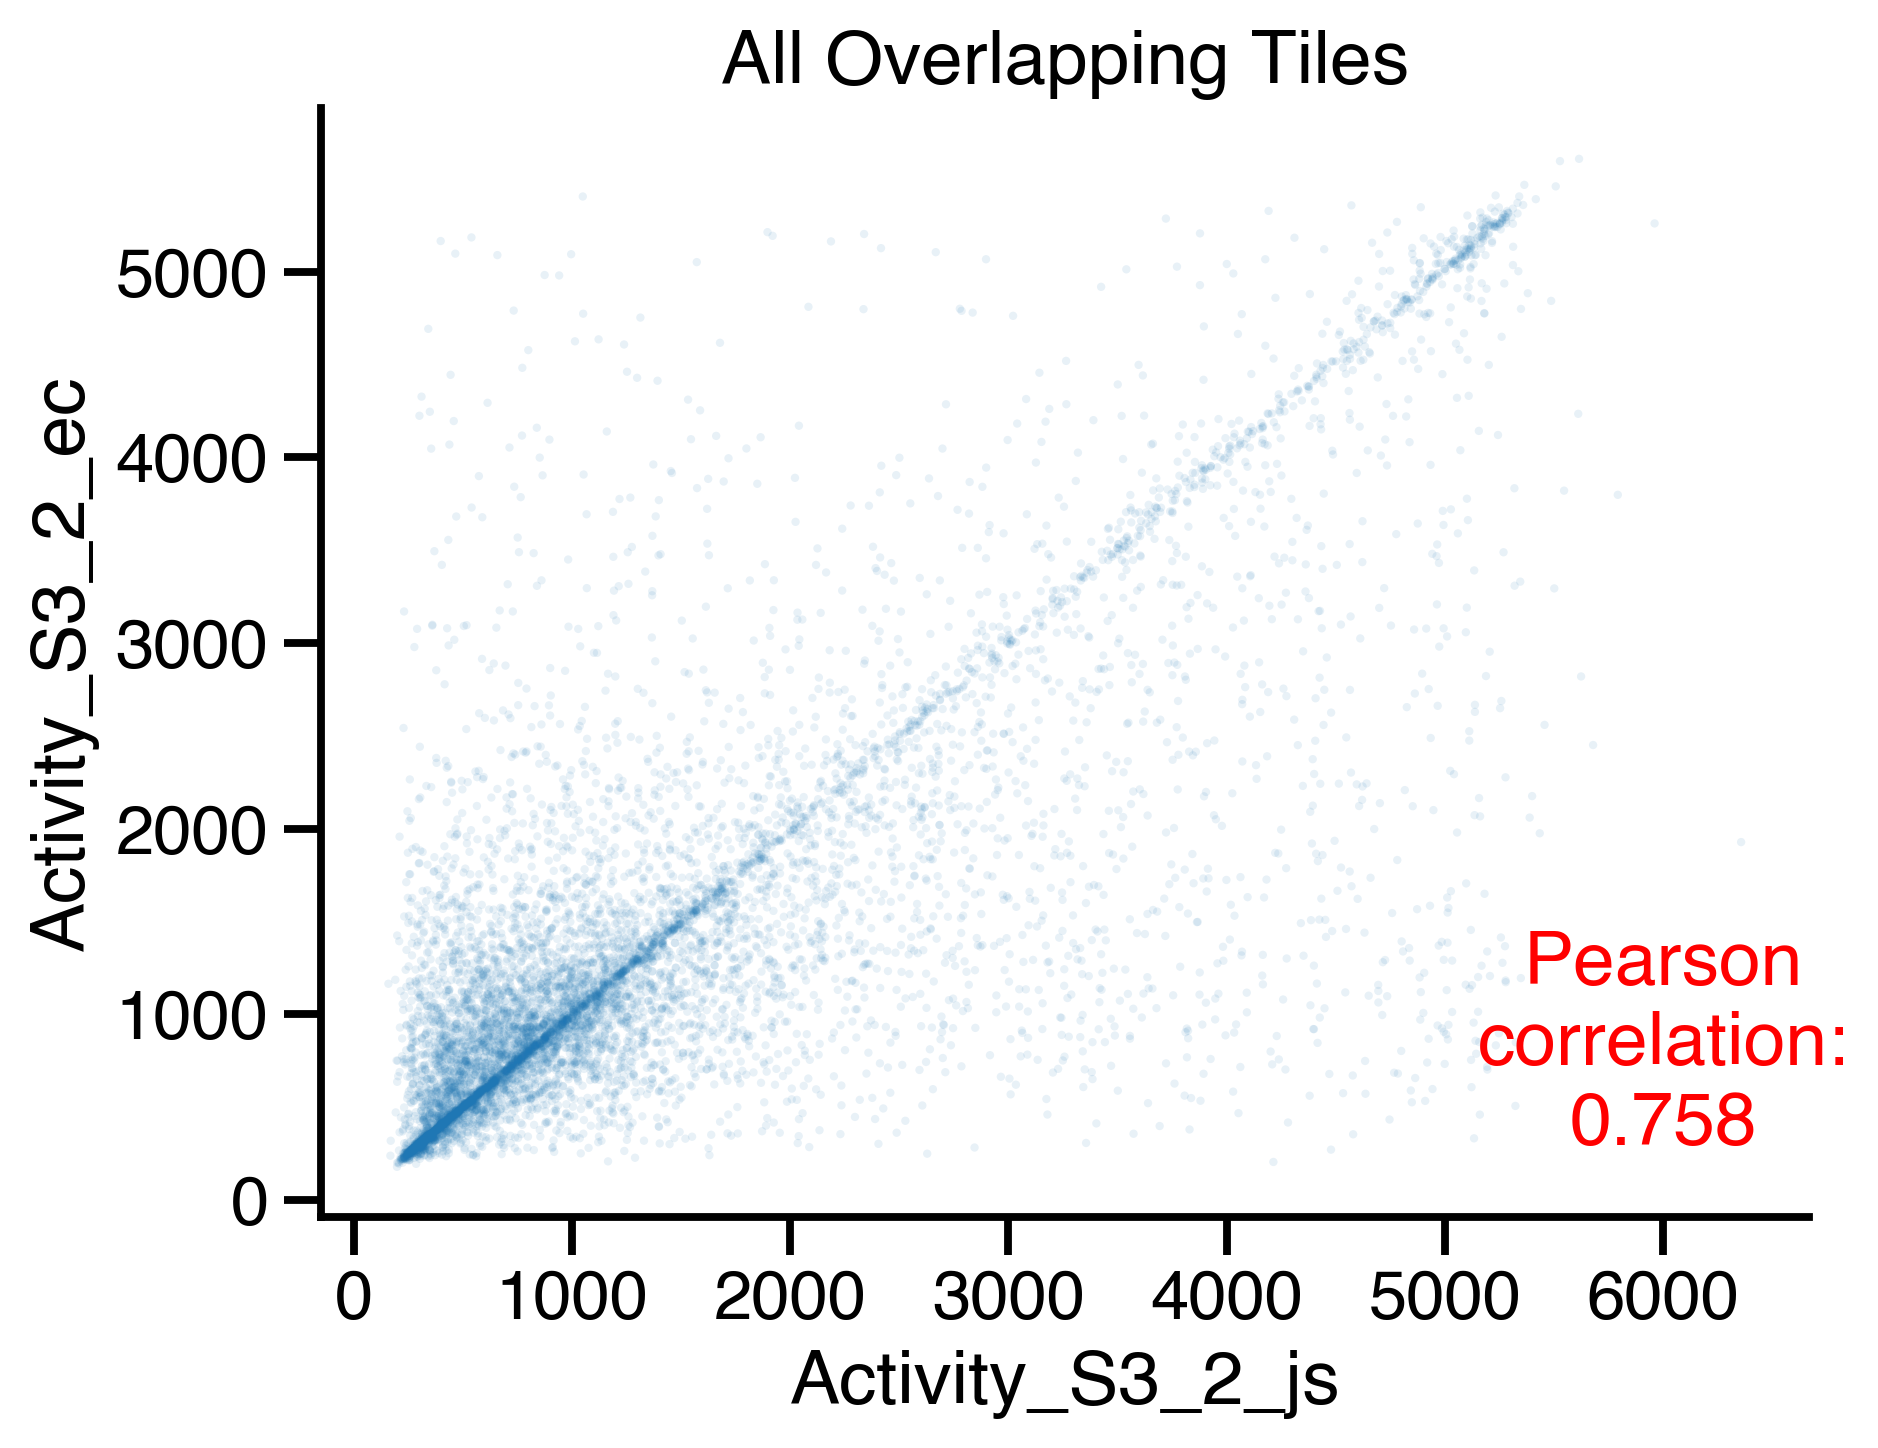

In [192]:
plt.figure(dpi = 300)
plt.title("All Overlapping Tiles")
plot_correl("Activity_S3_2_js", "Activity_S3_2_ec")

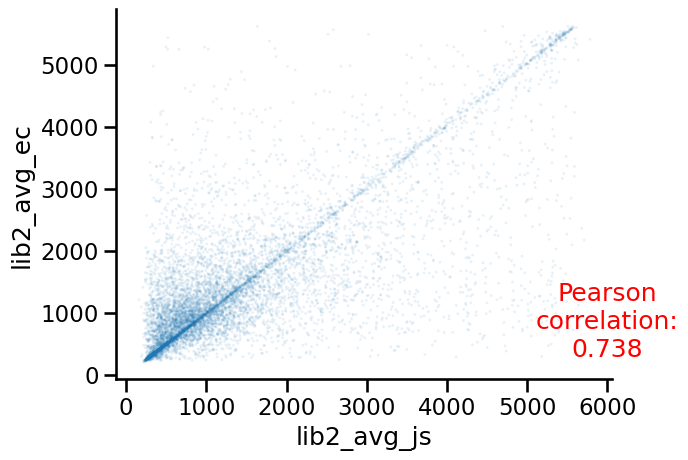

In [95]:
plot_correl("lib2_avg_js", "lib2_avg_ec")

## 3. Comparing reads

In [97]:
both

ArrayDNA  Activity_GFP8  \
0     ATTATTTGGCATTTGTTGGCTAAATCTGGTTTGTCTGGTTTGTCTT...     451.955540   
1     CCATCTGATTATGTTTCTGCTCATGAAGTTTCTTTGGCTGAAACTT...     423.885353   
2     GATTCTCATATTGCTTCTGATTATGTTACTCCATCTGATTATGTTT...     546.055903   
3     CAATTTATCTTAAATTCTCAACAATTGGTTGAAGCTTTGTCTTTGT...     504.125469   
4     TCTTTGGCTGAAACTTCTGAAGTTATGTGTATGGAAGATGAAGTTC...     383.458535   
...                                                 ...            ...   
9245  TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...            NaN   
9246  GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...            NaN   
9247  ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...            NaN   
9248  GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...            NaN   
9249  TATGATTTGGTTAATAAACAAGATGAAGATCCTAAGAATGATATGT...            NaN   

      Activity_S3_1_js  Activity_S3_2_js  reads_S3_1_js  reads_S3_2_js  \
0           553.464718        495.706275        12342.0         3089.0   
1           551.450656        764.304915        16211.0         1899.0   
2           544.271657        748.858276        21461.0         1105.0   
3           525.528897        922.926861         4034.0           86.0   
4           489.352841       1398.678654         3555.0          178.0   
...                ...               ...            ...            ...   
9245               NaN       3570.989020            NaN           11.0   
9246               NaN       3330.752810            NaN           13.0   
9247               NaN       5347.917675            NaN           11.0   
9248               NaN       5545.836977            NaN           21.0   
9249               NaN       5678.848247            NaN           17.0   

                                      AAseq_js  lib2_avg_js  lib2_std_js  \
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   524.585497    40.841386   
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   657.877786   150.510690   
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP   646.564966   144.664585   
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC   724.227879   281.002795   
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK   944.015747   642.990448   
...                                        ...          ...          ...   
9245  LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS  3570.989020          NaN   
9246  EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN  3330.752810          NaN   
9247  TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV  5347.917675          NaN   
9248  DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF  5545.836977          NaN   
9249  YDLVNKQDEDPKNDMLPNSNLSSSQQFIKPSMILSDNASV  5678.848247          NaN   

      Activity_S3_1_ec  Activity_S3_2_ec  reads_S3_1_ec  reads_S3_2_ec  \
0           444.761592        369.638636        21291.0        27676.0   
1           749.687642        716.012754        17170.0        20078.0   
2          1205.673067        921.201730           80.0           88.0   
3          1516.022615       1985.812713           34.0           33.0   
4          3495.779407       3769.355633          228.0          189.0   
...                ...               ...            ...            ...   
9245       3740.123701       3447.077589           84.0           73.0   
9246       3638.512152       3078.099946          102.0          111.0   
9247       2346.224267       1195.355529           12.0           18.0   
9248       3816.517233       3820.398149           56.0           72.0   
9249       2279.369792       2450.541273          101.0          105.0   

                                      AAseq_ec  lib2_avg_ec  lib2_std_ec  
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   407.200114    53.119951  
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   732.850198    23.811742  
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP  1063.437398   201.151612  
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC  1750.917664   332.191764  
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK  3632.567520   193.447605  
...              

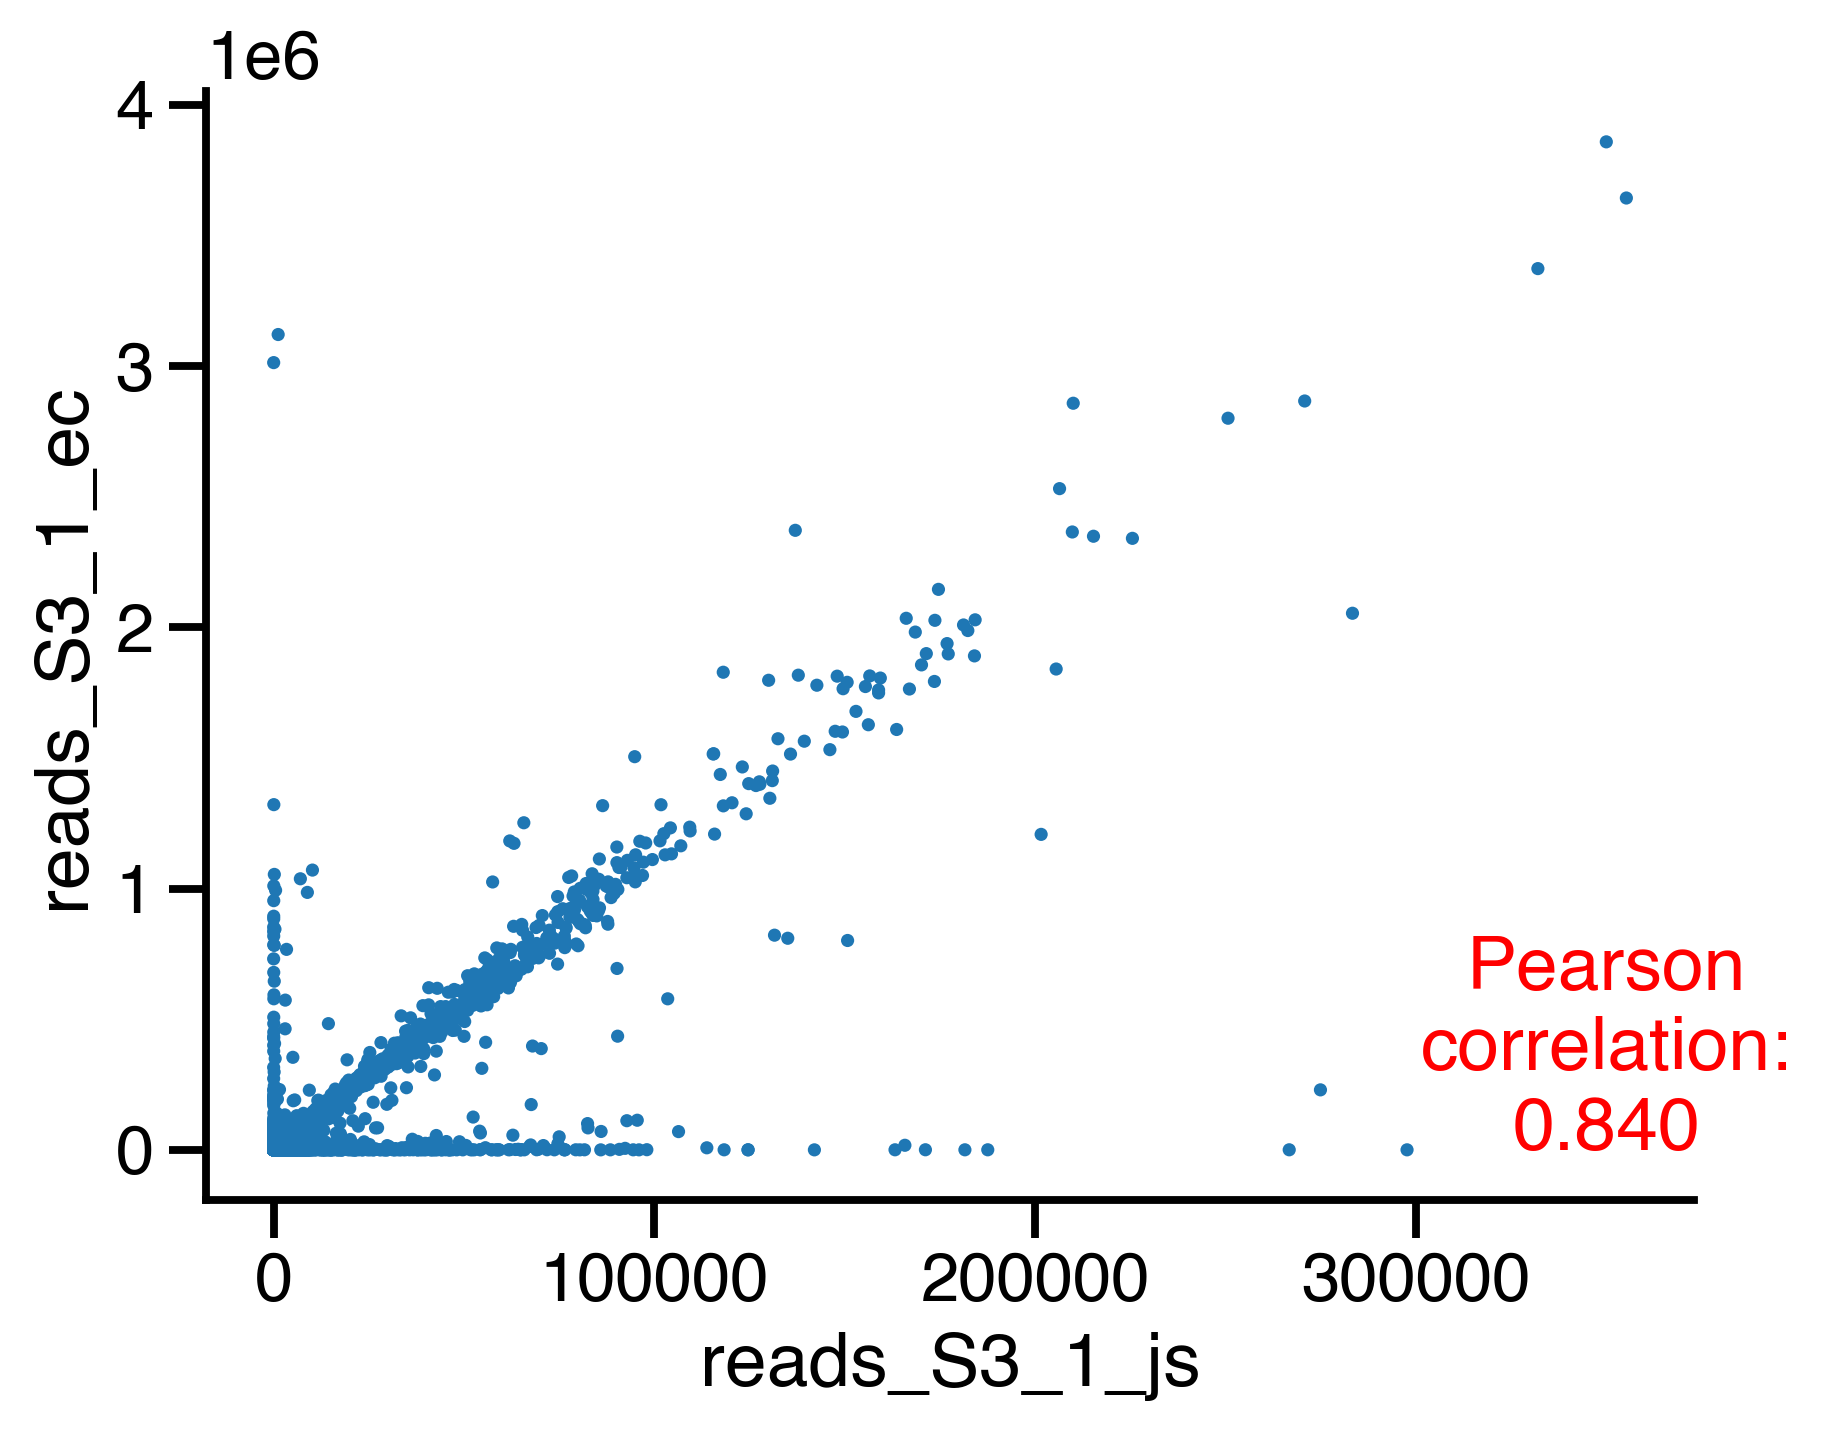

In [184]:
plt.figure(dpi = 300)
plot_correl("reads_S3_1_js", "reads_S3_1_ec", data = both, alpha = 1, s = 10, 
            text_x = 350000)

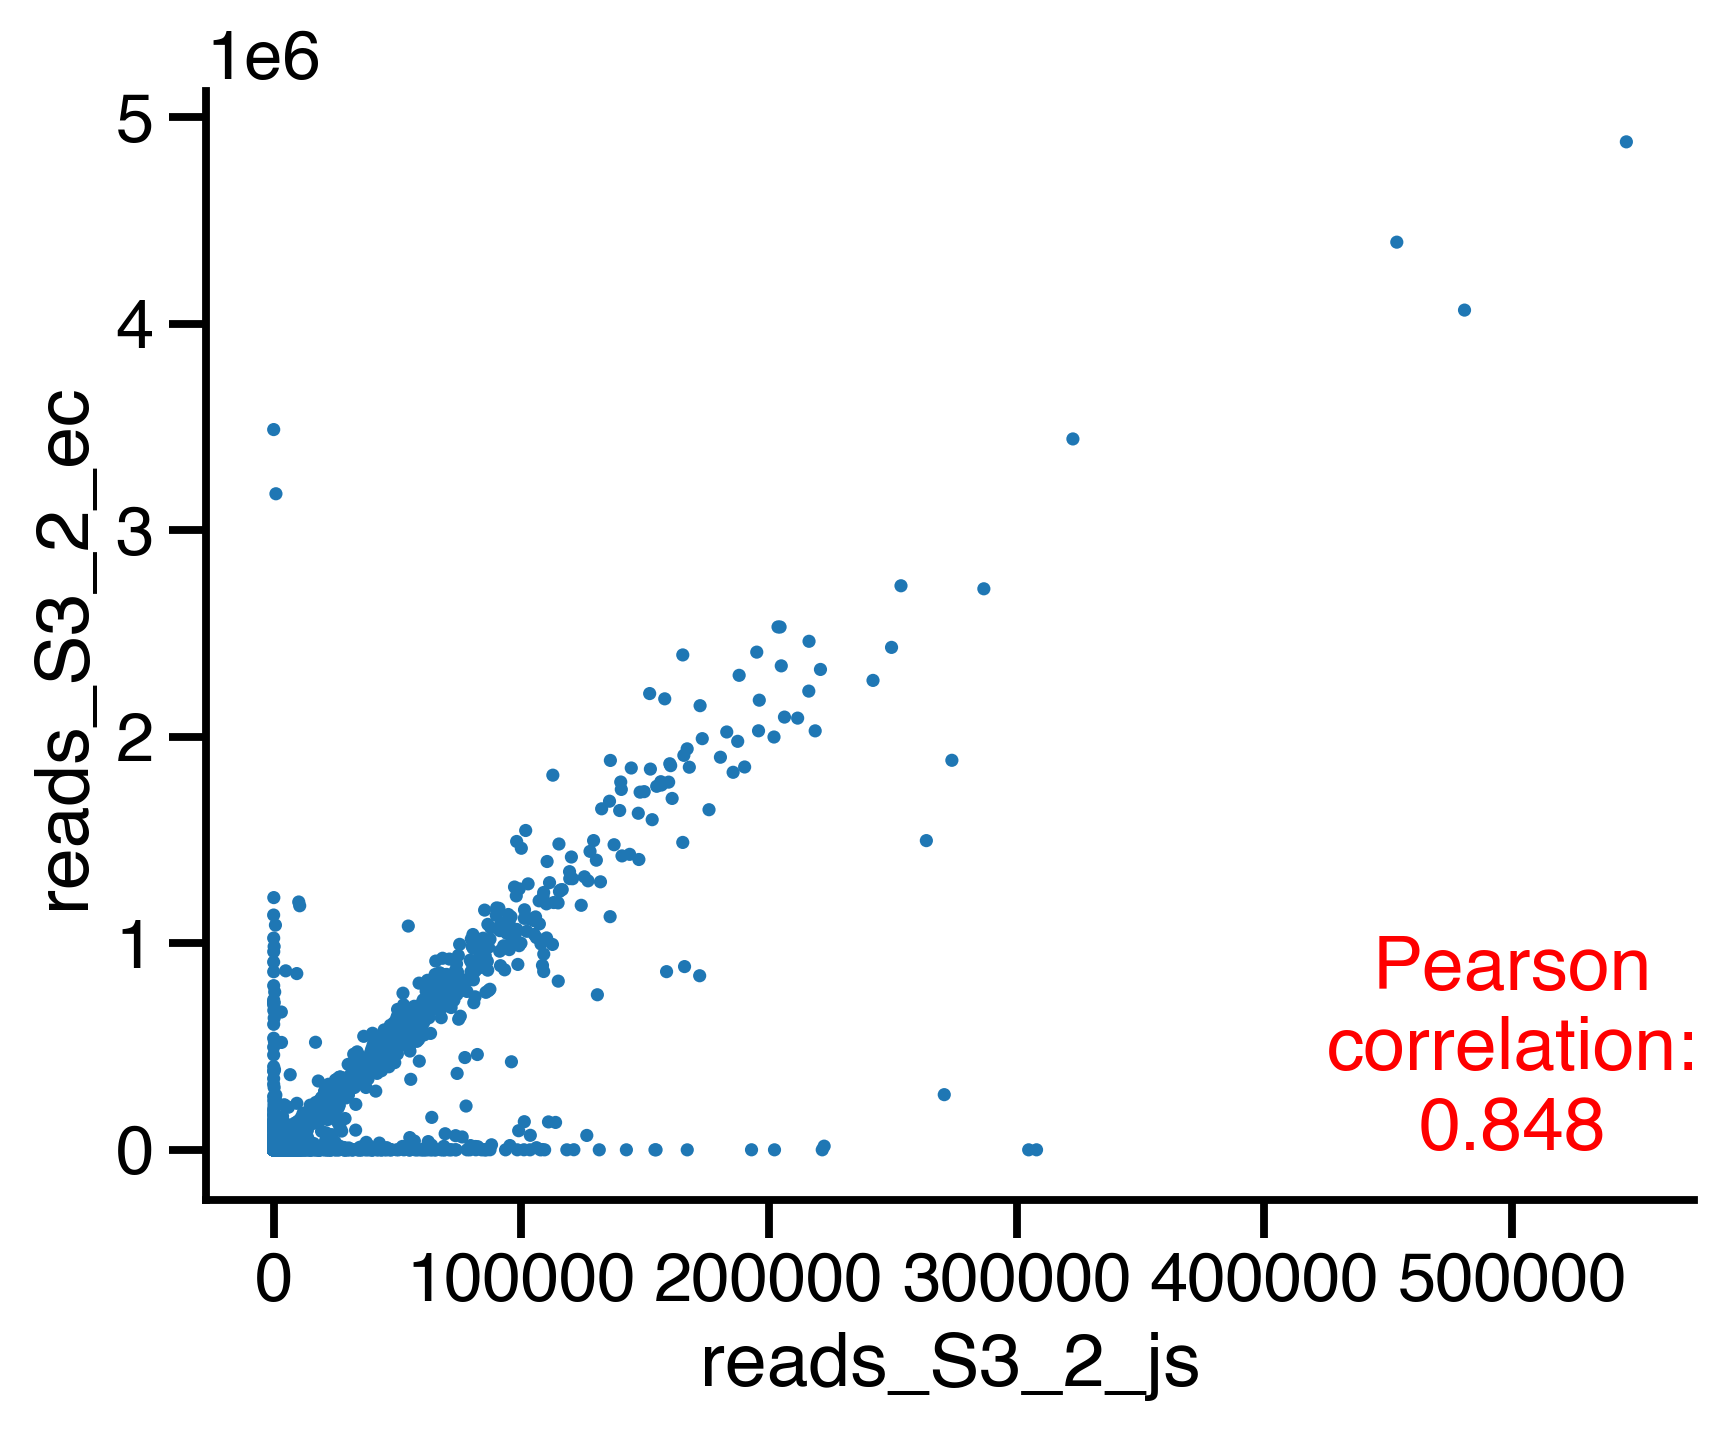

In [187]:
plt.figure(dpi = 300)
plot_correl("reads_S3_2_js", "reads_S3_2_ec", data = both, alpha = 1, s = 10, 
            text_x = 500000)

In [181]:
# sns.set_context('paper')
# sns.pairplot(both[["reads_S3_1_js", "reads_S3_2_js",
#                    "reads_S3_1_ec", "reads_S3_2_ec"]], 
#              plot_kws = {'s' : 2, 'edgecolor' : 'none', 'alpha' : 0.8},
#              diag_kws = {'bins' : 50}, 
#              corner = True,)

Which score is calculated with more reads?

In [121]:
np.mean(js_activities["reads_S3_1"])

6506.317355702017

In [122]:
np.mean(js_activities["reads_S3_2"])

6843.846033075151

In [123]:
np.mean(ec_activities["reads_S3_1"])

49286.31231658515

In [124]:
np.mean(ec_activities["reads_S3_2"])

53560.60611478634

EC's scores are calculated using many more reads

In [125]:
both

ArrayDNA  Activity_GFP8  \
0     ATTATTTGGCATTTGTTGGCTAAATCTGGTTTGTCTGGTTTGTCTT...     451.955540   
1     CCATCTGATTATGTTTCTGCTCATGAAGTTTCTTTGGCTGAAACTT...     423.885353   
2     GATTCTCATATTGCTTCTGATTATGTTACTCCATCTGATTATGTTT...     546.055903   
3     CAATTTATCTTAAATTCTCAACAATTGGTTGAAGCTTTGTCTTTGT...     504.125469   
4     TCTTTGGCTGAAACTTCTGAAGTTATGTGTATGGAAGATGAAGTTC...     383.458535   
...                                                 ...            ...   
9245  TTGGAACATGGTTTGGAAAGAGGTGCTAAAGAAATGTTGGATGATA...            NaN   
9246  GAAGATGAAGAATGGTTTGATGAAGAAGCTCAATTTATCTTGAATG...            NaN   
9247  ACTCAATCTCAATCTTCTAGATCTAGAAATATTCCACCACCACAAG...            NaN   
9248  GACTTTAAGAGAGATTTGGAAGAATGTCAGAAGATTGTCTTGGATC...            NaN   
9249  TATGATTTGGTTAATAAACAAGATGAAGATCCTAAGAATGATATGT...            NaN   

      Activity_S3_1_js  Activity_S3_2_js  reads_S3_1_js  reads_S3_2_js  \
0           553.464718        495.706275        12342.0         3089.0   
1           551.450656        764.304915        16211.0         1899.0   
2           544.271657        748.858276        21461.0         1105.0   
3           525.528897        922.926861         4034.0           86.0   
4           489.352841       1398.678654         3555.0          178.0   
...                ...               ...            ...            ...   
9245               NaN       3570.989020            NaN           11.0   
9246               NaN       3330.752810            NaN           13.0   
9247               NaN       5347.917675            NaN           11.0   
9248               NaN       5545.836977            NaN           21.0   
9249               NaN       5678.848247            NaN           17.0   

                                      AAseq_js  lib2_avg_js  lib2_std_js  \
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   524.585497    40.841386   
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   657.877786   150.510690   
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP   646.564966   144.664585   
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC   724.227879   281.002795   
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK   944.015747   642.990448   
...                                        ...          ...          ...   
9245  LEHGLERGAKEMLDDKEEREKDRDRERRGEEDPTWFDSGS  3570.989020          NaN   
9246  EDEEWFDEEAQFILNAQQLVEALSLCDDLLGAQDREEEEN  3330.752810          NaN   
9247  TQSQSSRSRNIPPPQANSSRAREIGNGSKTTMVDEIPMSV  5347.917675          NaN   
9248  DFKRDLEECQKIVLDPSNIELRPDPETFLSQLEFGSQDSF  5545.836977          NaN   
9249  YDLVNKQDEDPKNDMLPNSNLSSSQQFIKPSMILSDNASV  5678.848247          NaN   

      Activity_S3_1_ec  Activity_S3_2_ec  reads_S3_1_ec  reads_S3_2_ec  \
0           444.761592        369.638636        21291.0        27676.0   
1           749.687642        716.012754        17170.0        20078.0   
2          1205.673067        921.201730           80.0           88.0   
3          1516.022615       1985.812713           34.0           33.0   
4          3495.779407       3769.355633          228.0          189.0   
...                ...               ...            ...            ...   
9245       3740.123701       3447.077589           84.0           73.0   
9246       3638.512152       3078.099946          102.0          111.0   
9247       2346.224267       1195.355529           12.0           18.0   
9248       3816.517233       3820.398149           56.0           72.0   
9249       2279.369792       2450.541273          101.0          105.0   

                                      AAseq_ec  lib2_avg_ec  lib2_std_ec  
0     IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   407.200114    53.119951  
1     PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   732.850198    23.811742  
2     DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP  1063.437398   201.151612  
3     QFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPC  1750.917664   332.191764  
4     SLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAK  3632.567520   193.447605  
...              

## 4. S3_1 vs S3_2

Margot's slack response about S3 1 vs S3 2

That depends on the data:
- It is useful to start with comparing the activity of control tiles and wild type tiles between S3_1 and S3_2. If both are as expected, and matching the results from the first library sort from the first visit, then let's select one of the two based on tile diversity (see 2 bullet points below). If either S3_1 or S3_2 is diverging from what is expected for the control tiles, then we should continue with the one matching with expectations.
- If the number of unique tiles identified in S3_1 exceeds that of the sum of visit 1 sort library 1 and visit 2 sort S3_2 (mix of library 1 and 2), and  the activity of control tiles and wild type tiles look as expected than let's use S3_1. Remark that we will have to decide whether or not the presence of duplicates due to the mixing of the two libraries might have to be 'corrected for' during the analysis. Examples of duplicates include - amongst others - the basic wild type tiles and many of the phosphovariant tiles.
- If more tiles from library 2 are identified in visit 2 S3_2 than in visit 2 S3_1, then we should use S3_2. Remark that in order to compare results between the first and second library, thus comparing sorts from the first and second visit, we might have to scale the activity scores.

Plan:

1. Are both measurements similar?
- Control tiles S3_1 vs S3_2
- WT tiles S3_1 vs S3_2

2. Does S3_1 or S3_2 have more tiles from library 2?

In [209]:
BasicArTh = sog1_helpers.return_activities("BasicArTh", pos_regex = r'\.(\d+)')
BasicArTh.head(3)

Description   Other  Start  mid  End  \
0  BasicArTh.1  Q6NQK2      1   21   41   
1  BasicArTh.2  Q6NQK2     11   31   51   
2  BasicArTh.3  Q6NQK2     21   41   61   

                                       tile  Activity_S3_1  Activity_S3_2  \
0  MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP    1407.799127    1244.615820   
1  NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD    4479.018364    3954.541874   
2  SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR    1434.266772    1013.665108   

      lib2_avg  
0  1326.207474  
1  4216.780119  
2  1223.965940

In [133]:
both_wt_meas = both[both["AAseq_ec"].isin(BasicArTh["tile"])]
both_wt_meas.head(3)

ArrayDNA  Activity_GFP8  \
0  ATTATTTGGCATTTGTTGGCTAAATCTGGTTTGTCTGGTTTGTCTT...     451.955540   
1  CCATCTGATTATGTTTCTGCTCATGAAGTTTCTTTGGCTGAAACTT...     423.885353   
2  GATTCTCATATTGCTTCTGATTATGTTACTCCATCTGATTATGTTT...     546.055903   

   Activity_S3_1_js  Activity_S3_2_js  reads_S3_1_js  reads_S3_2_js  \
0        553.464718        495.706275        12342.0         3089.0   
1        551.450656        764.304915        16211.0         1899.0   
2        544.271657        748.858276        21461.0         1105.0   

                                   AAseq_js  lib2_avg_js  lib2_std_js  \
0  IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   524.585497    40.841386   
1  PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   657.877786   150.510690   
2  DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP   646.564966   144.664585   

   Activity_S3_1_ec  Activity_S3_2_ec  reads_S3_1_ec  reads_S3_2_ec  \
0        444.761592        369.638636        21291.0        27676.0   
1        749.687642        716.012754        17170.0        20078.0   
2       1205.673067        921.201730           80.0           88.0   

                                   AAseq_ec  lib2_avg_ec  lib2_std_ec  
0  IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN   407.200114    53.119951  
1  PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE   732.850198    23.811742  
2  DSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQP  1063.437398   201.151612

Text(0.5, 1.0, 'WT Tiles')

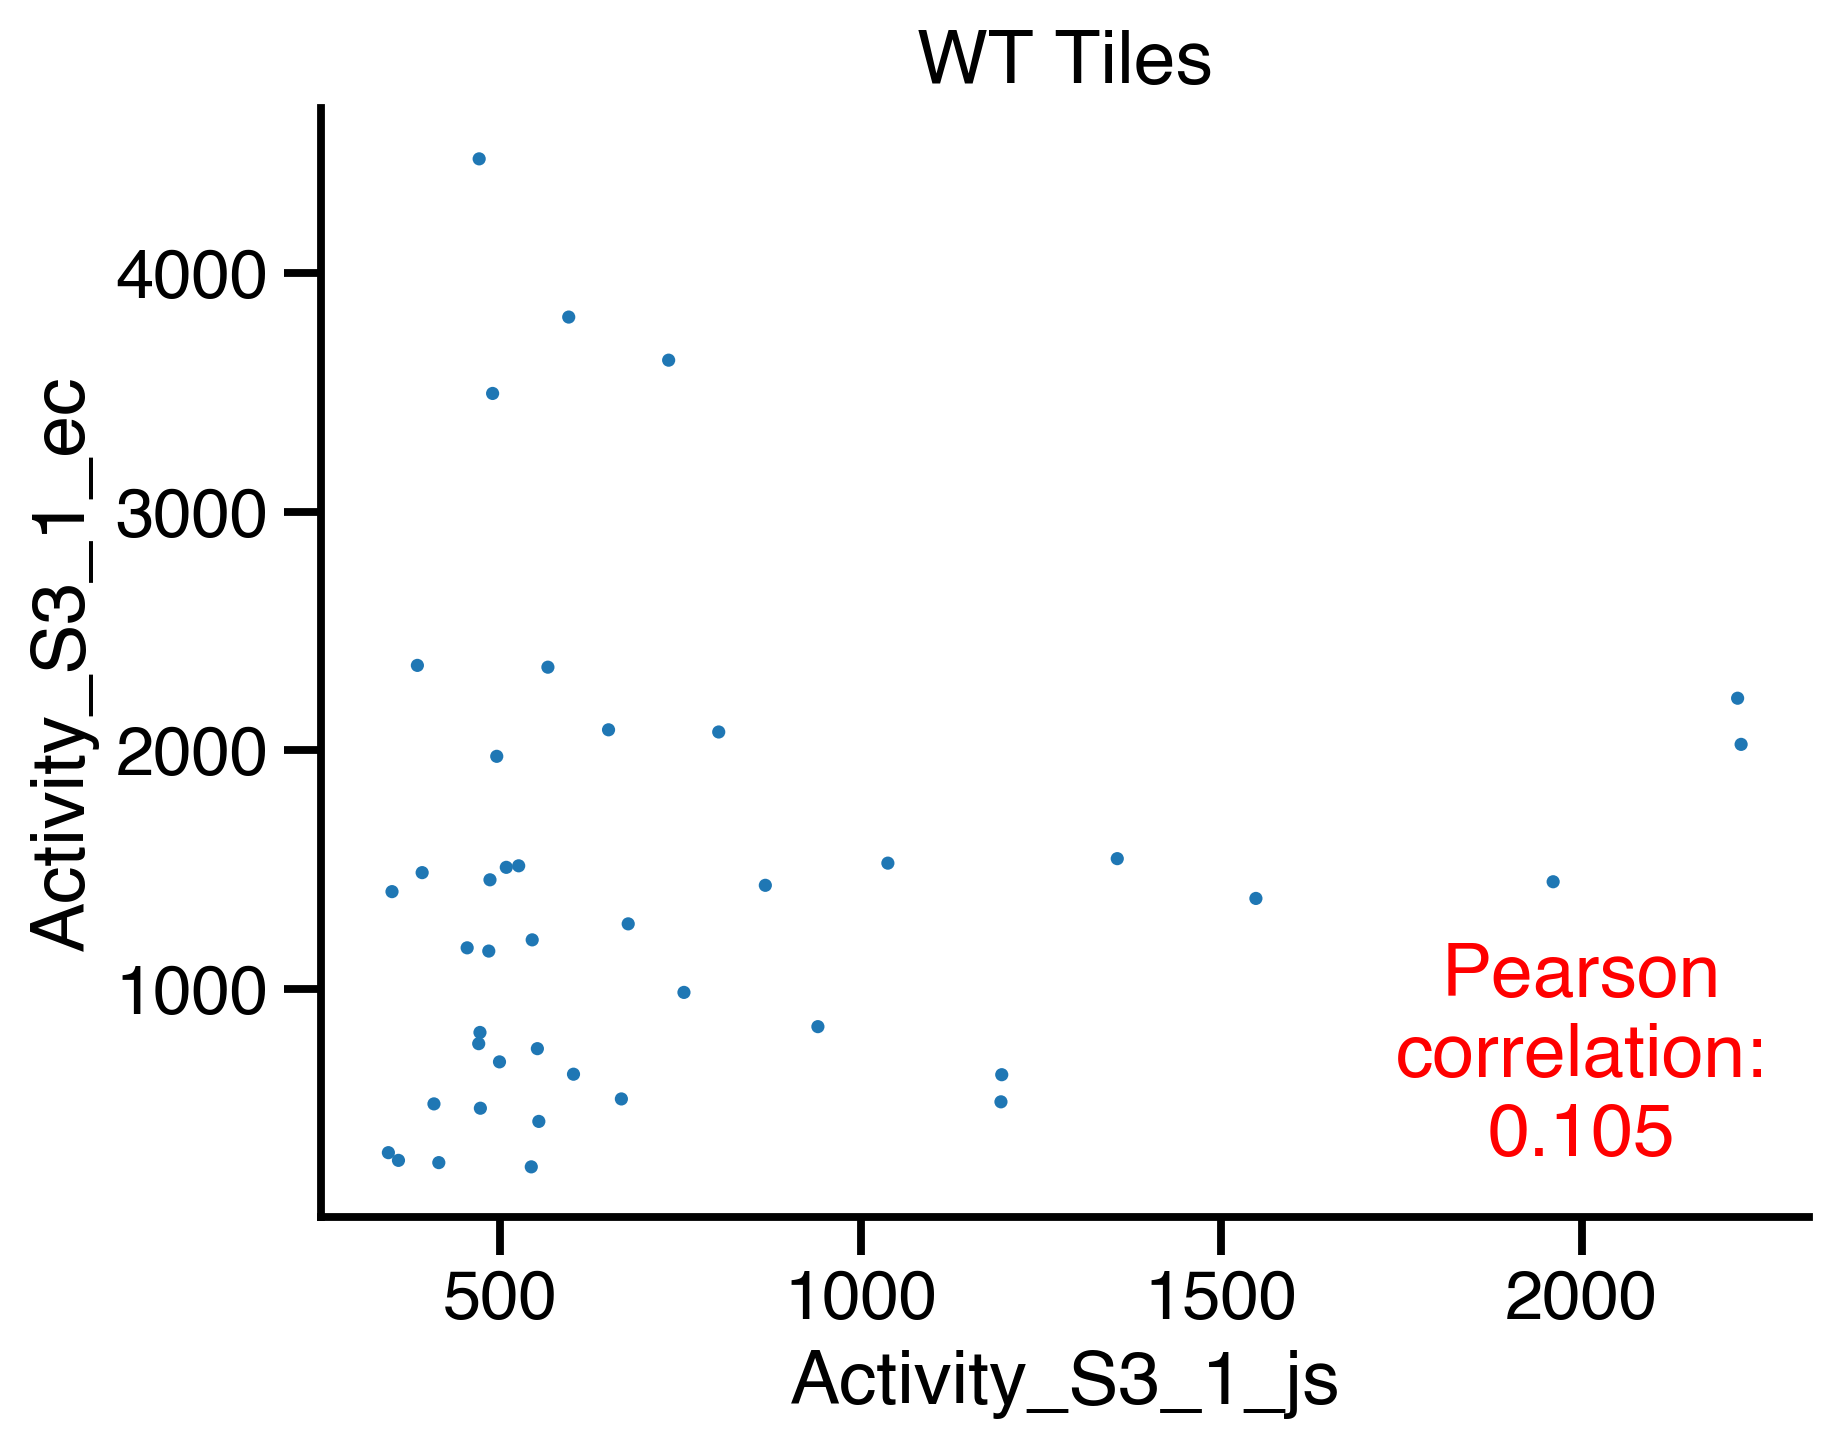

In [173]:
plt.figure(dpi = 300)
plot_correl("Activity_S3_1_js", "Activity_S3_1_ec", data = both_wt_meas, alpha = 1, s = 10, 
            text_x = 2000, text_y = 300)
plt.title("WT Tiles")

Text(0.5, 1.0, 'WT Tiles')

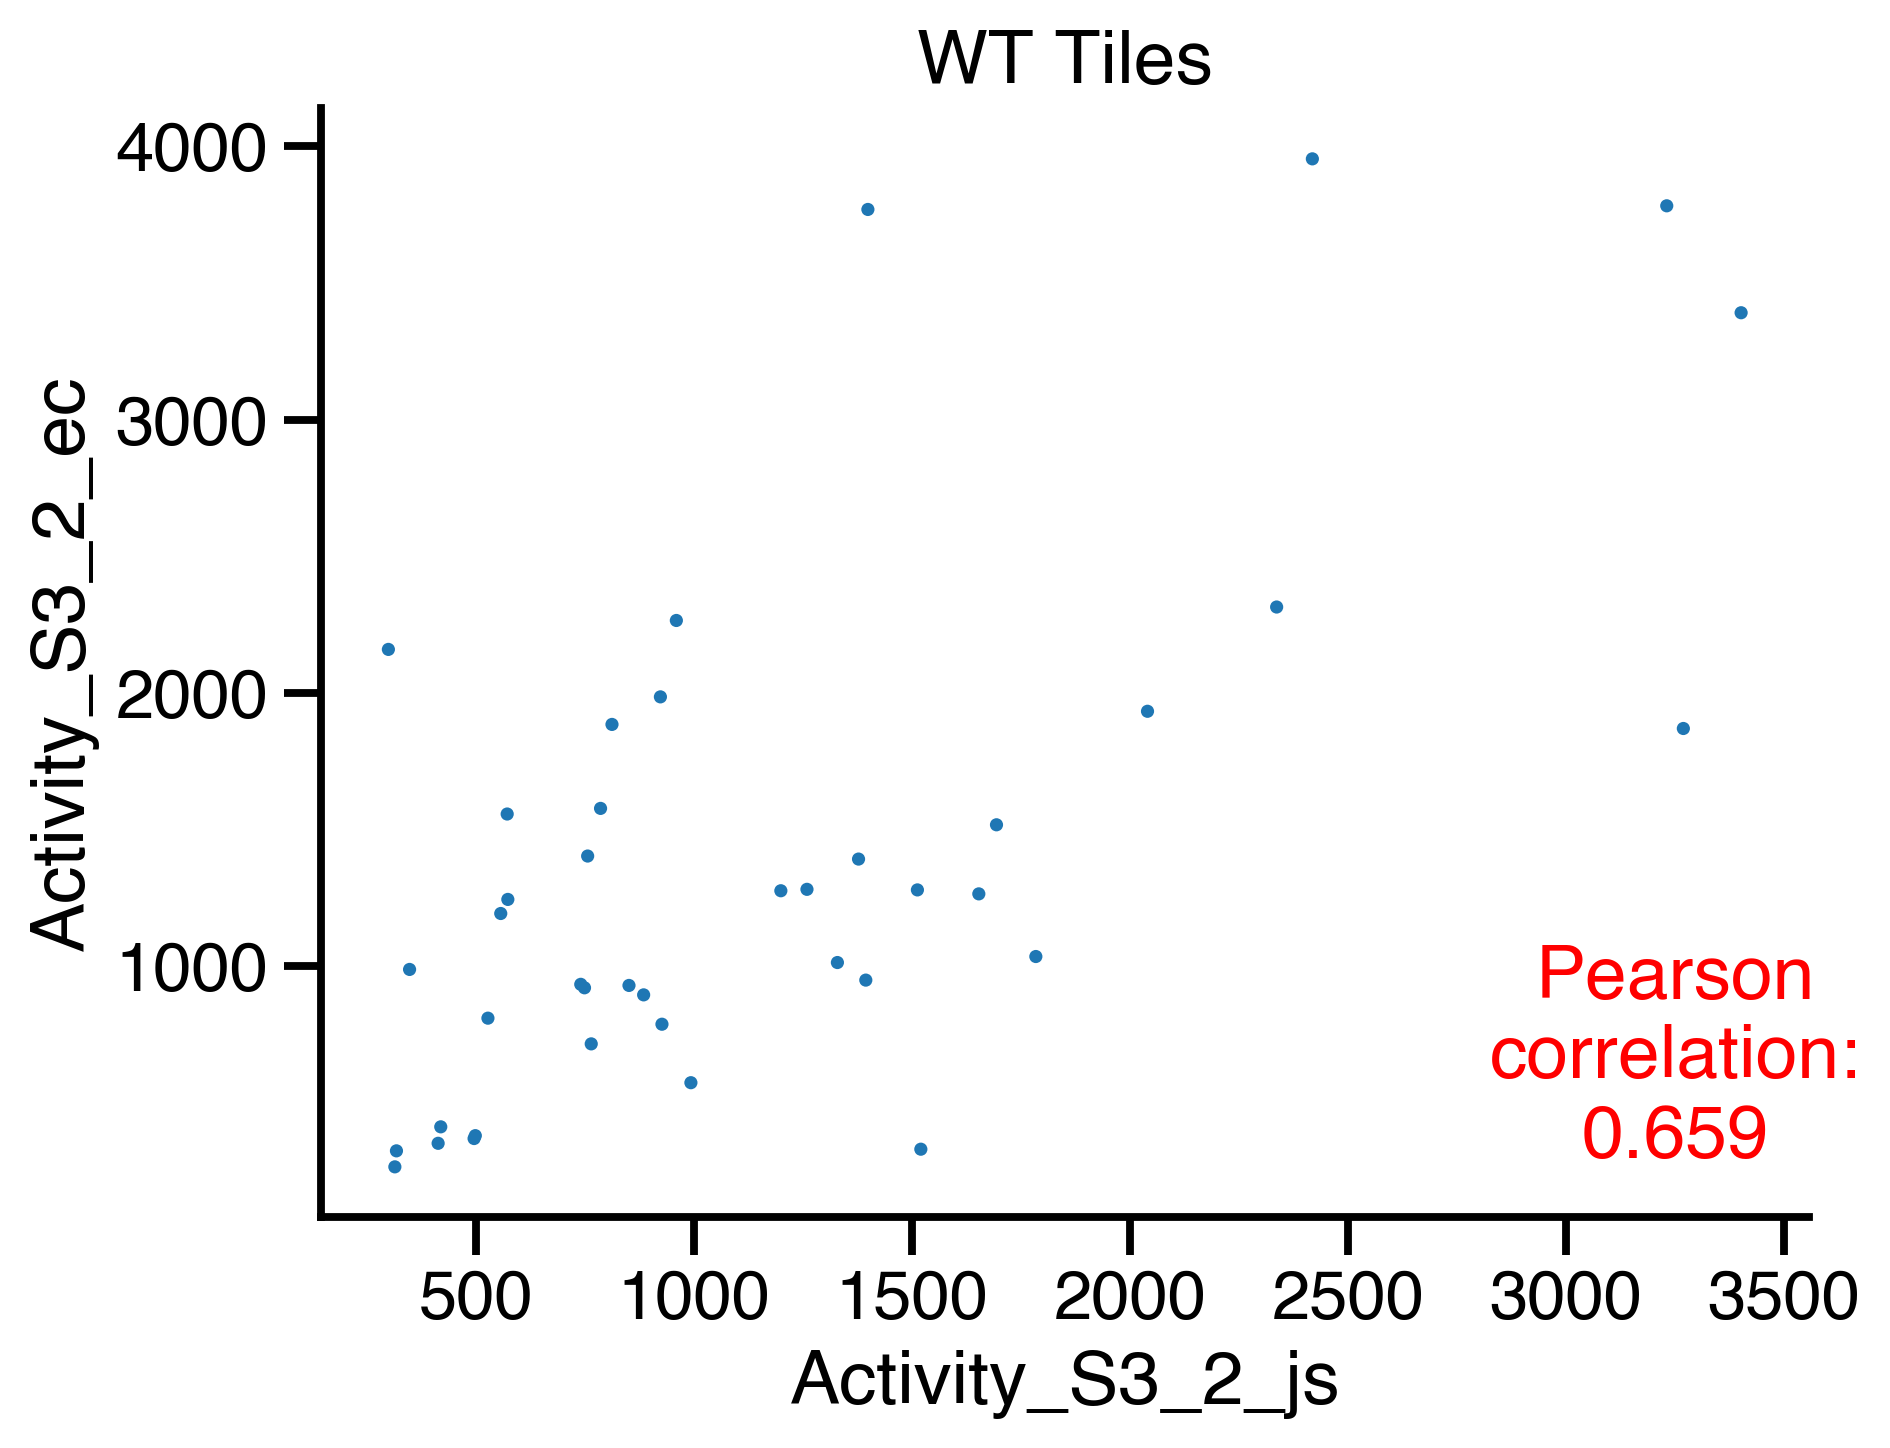

In [174]:
plt.figure(dpi = 300)
plot_correl("Activity_S3_2_js", "Activity_S3_2_ec", data = both_wt_meas, alpha = 1, s = 10, 
            text_x = 3250)
plt.title("WT Tiles")

In [150]:
control_seqs = pd.read_csv("../data/control_seqs.txt", sep = "\t")
control_seqs.head(3)

Description                                ProteinSeq             Other
0        AD1_0  STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF        GAL4_AD1_0
1  AD1_Aro2A_0  STIPLDAMPRDALHGADASEEDDMSDGLPALKTDPNNNGA  GAL4_AD1_Aro2A_0
2    AD1_L2A_0  STIPADFMPRDAAHGFDWSEEDDMSDGAPFAKTDPNNNGF    GAL4_AD1_L2A_0

In [152]:
both_ctrl = both[both["AAseq_ec"].isin(control_seqs["ProteinSeq"])]
both_ctrl.head(3)

ArrayDNA  Activity_GFP8  \
13  GGTCCTAAGACTCCAGAAATTTCTTCTATGTTGGTTAATAATAATG...     371.839745   
20  CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...     427.740464   
32  TCTACTGATTCTACTCCAGCTGCTGAAGCTGAGAATGCTGAAGATA...     361.430211   

    Activity_S3_1_js  Activity_S3_2_js  reads_S3_1_js  reads_S3_2_js  \
13        463.462358       1051.058599        12535.0         1324.0   
20       1761.106655       1785.595379        36828.0        35369.0   
32        971.751793       1854.974289        13184.0         7542.0   

                                    AAseq_js  lib2_avg_js  lib2_std_js  \
13  GPKTPEISSMLVNNNEASFVEETNAAKKLKPNSDESDDLM   757.260478   415.493287   
20  PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP  1773.351017    17.316142   
32  STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK  1413.363041   624.532616   

    Activity_S3_1_ec  Activity_S3_2_ec  reads_S3_1_ec  reads_S3_2_ec  \
13       1034.893032        937.521672         1993.0         2291.0   
20       1815.392358       1787.619375       374802.0       376448.0   
32       1522.322628       1863.850546        74799.0        80249.0   

                                    AAseq_ec  lib2_avg_ec  lib2_std_ec  
13  GPKTPEISSMLVNNNEASFVEETNAAKKLKPNSDESDDLM   986.207352    68.851949  
20  PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP  1801.505866    19.638464  
32  STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK  1693.086587   241.496707

Text(0.5, 1.0, 'Control Tiles')

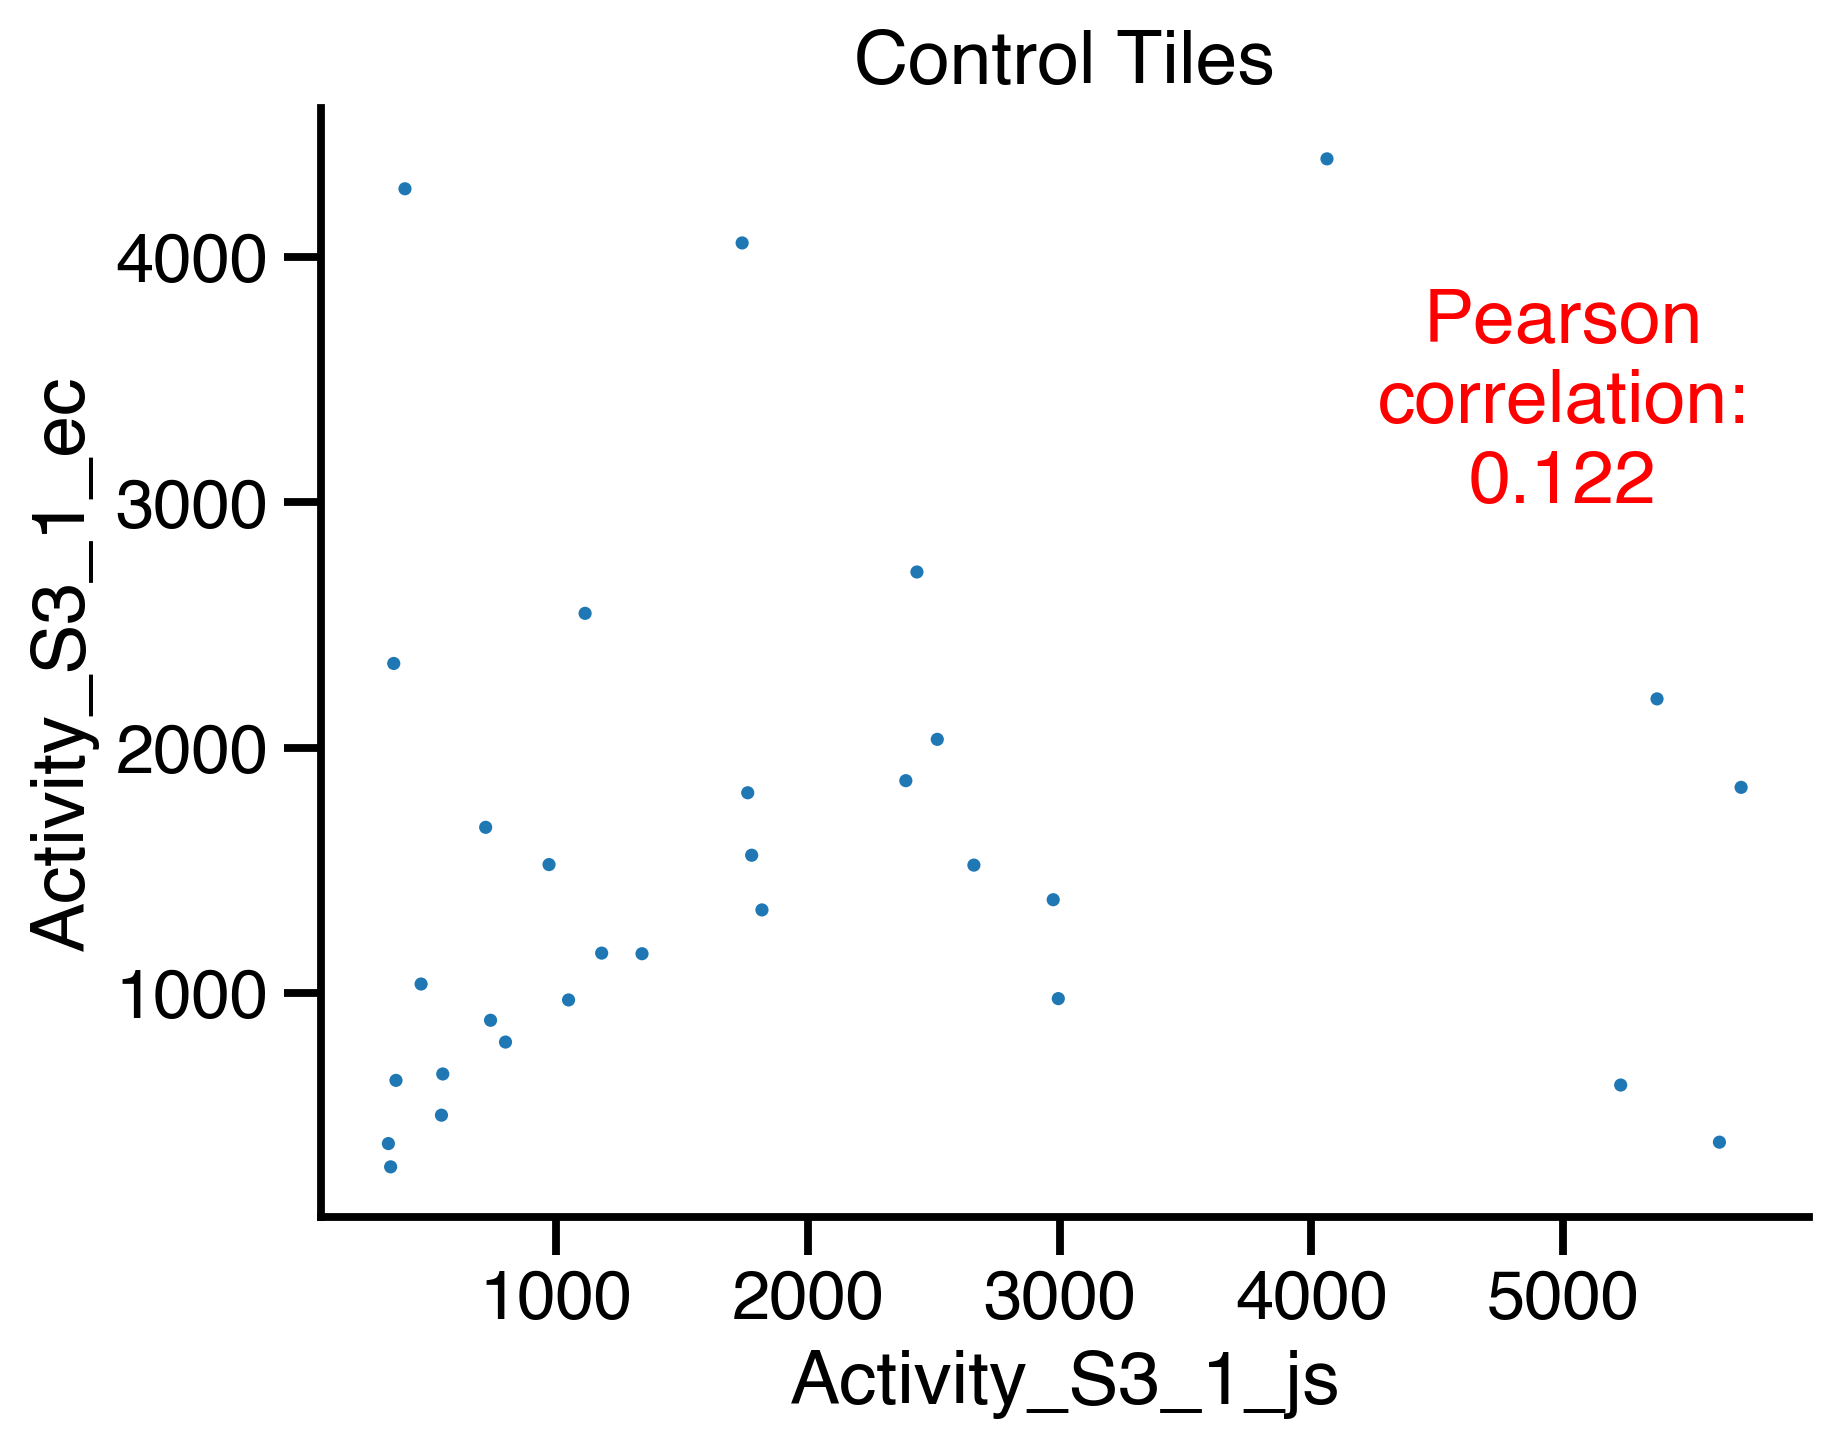

In [176]:
plt.figure(dpi = 300)
plot_correl("Activity_S3_1_js", "Activity_S3_1_ec", data = both_ctrl, alpha = 1, s = 10, text_x =5000, text_y = 3000)
plt.title("Control Tiles")

Text(0.5, 1.0, 'Control Tiles')

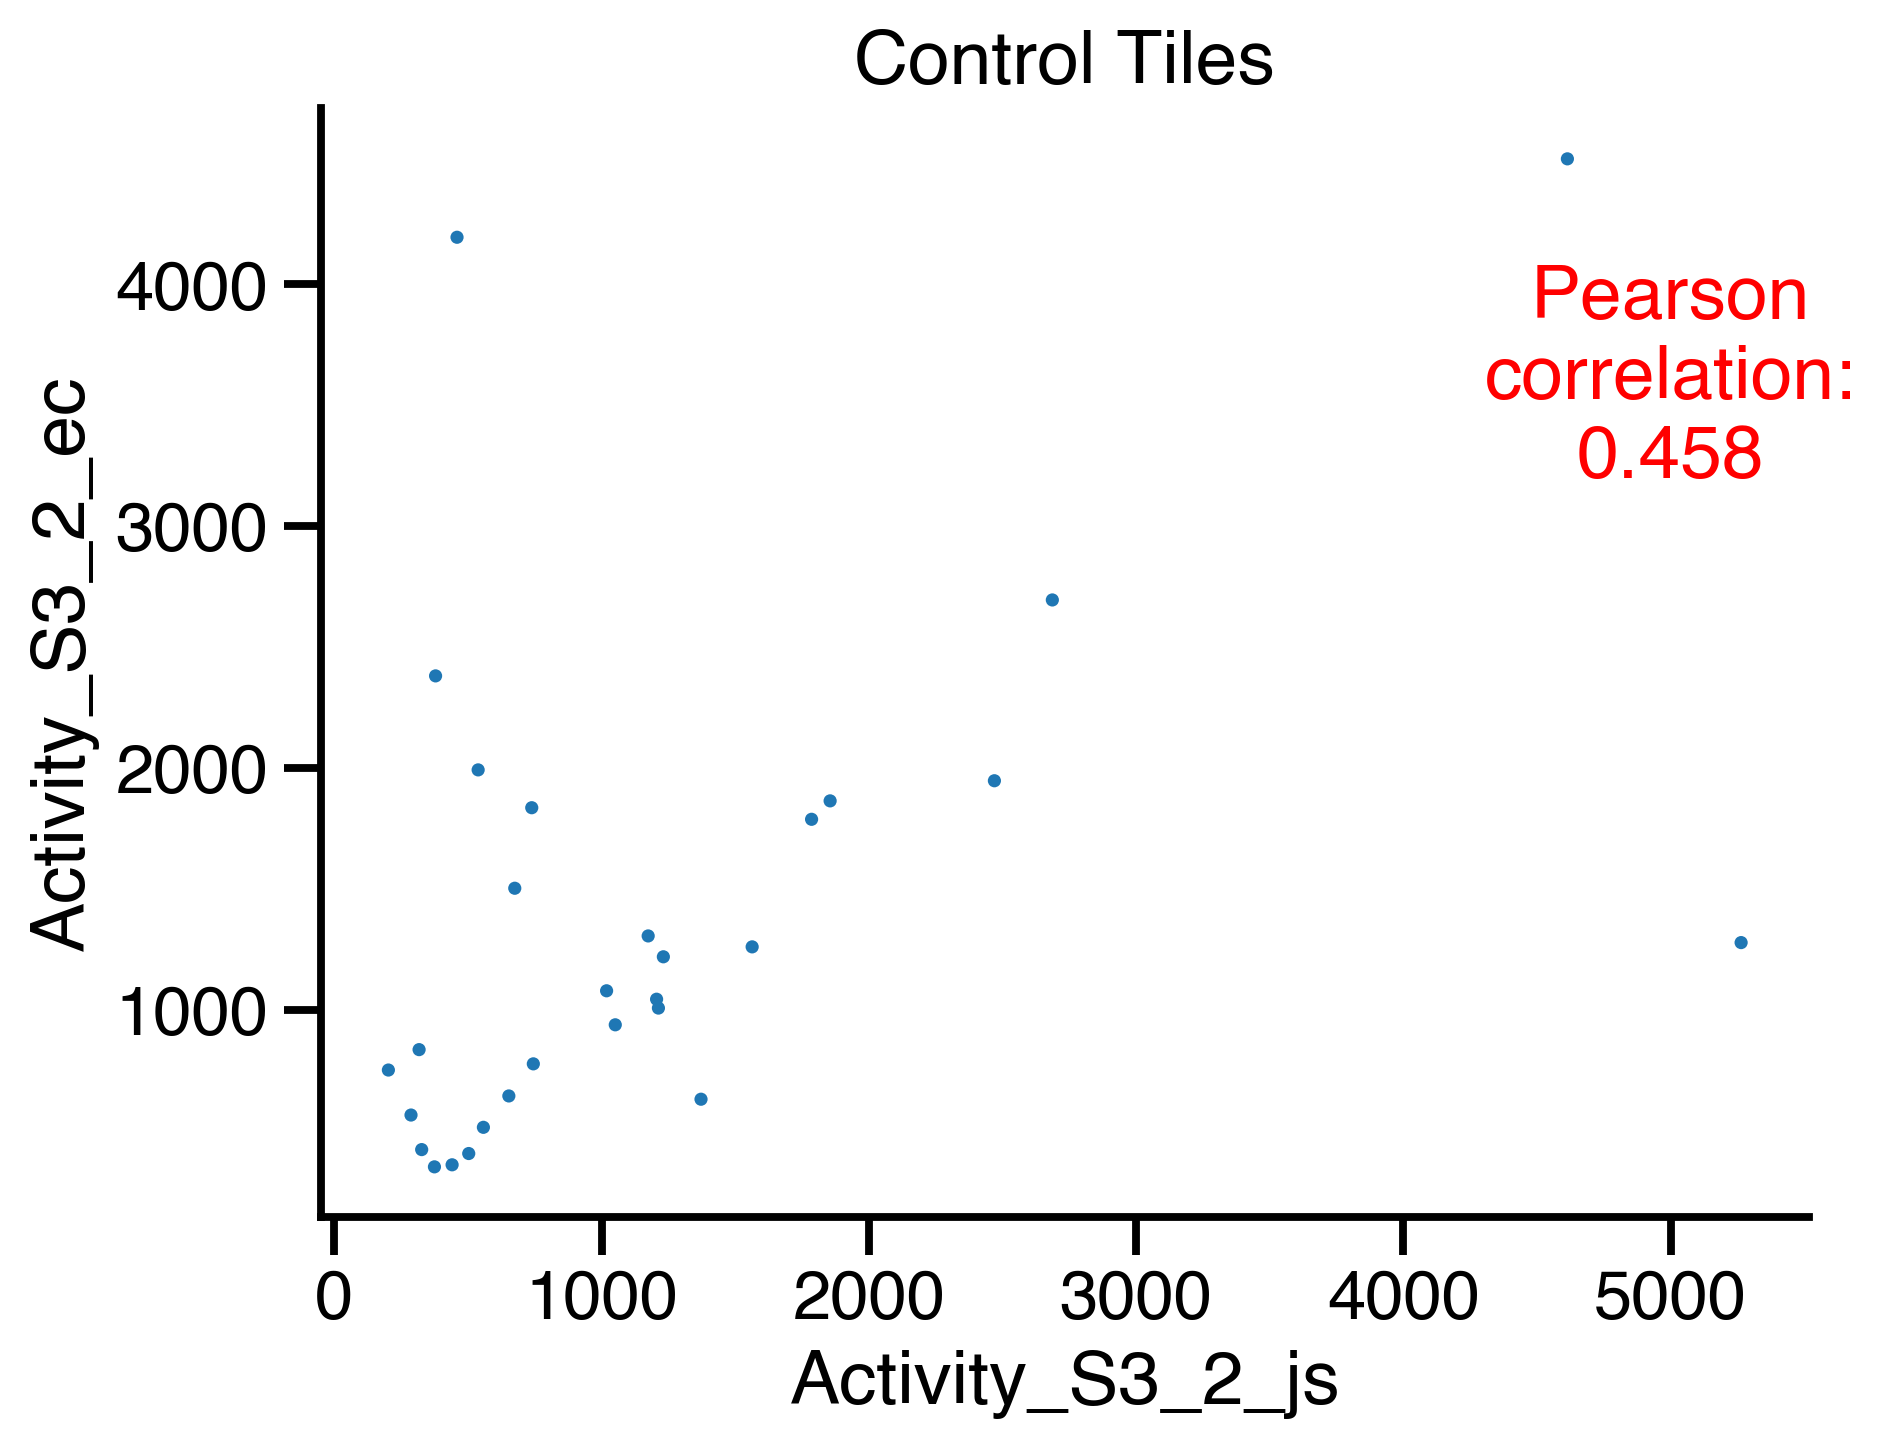

In [177]:
plt.figure(dpi = 300)
plot_correl("Activity_S3_2_js", "Activity_S3_2_ec", data = both_ctrl, alpha = 1, s = 10, text_x = 5000, text_y = 3200)
plt.title("Control Tiles")

## 5. Which has more measurements for library 2 members?

In [193]:
library = pd.read_excel("../margot_raw/SeqLib_Visit2_2023.xlsx", sheet_name = "Visit2")
library = library[["ProteinSeq", "Description", "Other"]]
library["Description"] = library["Description"].astype(str)

In [199]:
activities_EC = pd.read_csv("../data/Sog1_library2_activities_with_reads_ECspike.csv")
activities_EC

ArrayDNA  Activity_S3_1  \
0      AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...    1079.074274   
1      AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...    1394.076068   
2      AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...    1371.861742   
3      AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...     283.663233   
4      AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...    4076.691936   
...                                                  ...            ...   
11264  TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGT...    2314.792506   
11265  TTTGATTGGGAACCAACTGATTCTGGTTCTCAATTTATCTTAAATT...    4433.599889   
11266  TTTGCTGCTGGTGCTAGGAAGAGAAGGAAGATTCATGATGATGACT...    1673.484641   
11267  TTTGTTAAAGATTCTTTGCAAGATATTGGTAAATACTTTGAAATTG...    1780.391373   
11268  TTTGTTGCTTCTCAATTGATGTCTCAAGAAGATGGTGTTTCTGGAT...     353.480826   

       Activity_S3_2  reads_S3_1  reads_S3_2  \
0         925.703811       610.0       643.0   
1        1424.548173     44354.0     36001.0   
2        1170.193129        68.0        38.0   
3         267.611412      5090.0      7330.0   
4        3163.539743       172.0       137.0   
...              ...         ...         ...   
11264    2111.813429       124.0       121.0   
11265    4873.732571      6379.0      8831.0   
11266    1569.322449       816.0       769.0   
11267    2360.015854        75.0        73.0   
11268     313.050935     20451.0     22188.0   

                                          AAseq     lib2_avg    lib2_std  
0      KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL  1002.389042  108.449295  
1      KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1409.312120   21.547032  
2      KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM  1271.027436  142.601244  
3      KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP   275.637323   11.350351  
4      KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD  3620.115839  645.696108  
...                                         ...          ...         ...  
11264  FDSPDVAESFETSPLFANADADLAGQDAWFSLFPSISGGE  2213.302968  143.527882  
11265  FDWEPTDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN  4653.666230  311.220804  
11266  FAAGARKRRKIHDDDFGDVRWHKAGRAKPVVLDGVQRGCK  1621.403545   73.653793  
11267  FVKDSLQDIGKYFEIDSTLDELEQVESGEGNDDLPDEEER  2070.203613  409.856401  
11268  FVASQLMSQEDGVSGFGGHHEEDNNKIGHYNNEESNNKGS   333.265881   28.588250  

[11269 rows x 8 columns]

In [202]:
#19,000 unique members of library
len(library["ProteinSeq"].unique())

19723

In [203]:
# We have measuremebts for 4,823 of these 19, 723
lib2_activities_EC = activities_EC[activities_EC["AAseq"].isin(library["ProteinSeq"])]
lib2_activities_EC

ArrayDNA  Activity_S3_1  \
0      AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...    1079.074274   
2      AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...    1371.861742   
3      AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...     283.663233   
5      AAACAACAACCATGCTTTGGTGATTATGCTCATTTGGGTGGTACTG...    1508.490533   
13     AAACAAGATTTGGAGAAATGTCATGAATTGGGTTTGTCTGATGCTG...    1294.164331   
...                                                  ...            ...   
11256  TTTGATCCATCTGATCCAGAAATTATTTGGCATTTGTTGGCTAAGA...    1865.912984   
11264  TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGT...    2314.792506   
11266  TTTGCTGCTGGTGCTAGGAAGAGAAGGAAGATTCATGATGATGACT...    1673.484641   
11267  TTTGTTAAAGATTCTTTGCAAGATATTGGTAAATACTTTGAAATTG...    1780.391373   
11268  TTTGTTGCTTCTCAATTGATGTCTCAAGAAGATGGTGTTTCTGGAT...     353.480826   

       Activity_S3_2  reads_S3_1  reads_S3_2  \
0         925.703811       610.0       643.0   
2        1170.193129        68.0        38.0   
3         267.611412      5090.0      7330.0   
5        1865.122581       163.0       209.0   
13       1269.442354     26353.0     24153.0   
...              ...         ...         ...   
11256    1733.697343        70.0        50.0   
11264    2111.813429       124.0       121.0   
11266    1569.322449       816.0       769.0   
11267    2360.015854        75.0        73.0   
11268     313.050935     20451.0     22188.0   

                                          AAseq     lib2_avg    lib2_std  
0      KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL  1002.389042  108.449295  
2      KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM  1271.027436  142.601244  
3      KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP   275.637323   11.350351  
5      KQQPCFGDYAHLGGTDDFKRDLEDCQKLVLDPCNIDLDTP  1686.806557  252.176940  
13     KQDLEKCHELGLSDADFRLSQIEFSQDSCTAAWAGGNMLD  1281.803343   17.481077  
...                                         ...          ...         ...  
11256  FDPSDPEIIWHLLAKTGSLGLTPHPFIDEFIPTVDQDDGI  1799.805163   93.490576  
11264  FDSPDVAESFETSPLFANADADLAGQDAWFSLFPSISGGE  2213.302968  143.527882  
11266  FAAGARKRRKIHDDDFGDVRWHKAGRAKPVVLDGVQRGCK  1621.403545   73.653793  
11267  FVKDSLQDIGKYFEIDSTLDELEQVESGEGNDDLPDEEER  2070.203613  409.856401  
11268  FVASQLMSQEDGVSGFGGHHEEDNNKIGHYNNEESNNKGS   333.265881   28.588250  

[4823 rows x 8 columns]

In [204]:
lib2_activities_EC[["Activity_S3_1", "Activity_S3_2"]].isna().sum()

Activity_S3_1    11
Activity_S3_2    37
dtype: int64

# Sort 2

In [243]:
sort2 = pd.read_csv("../data/Sog1_all_activities_and_tiles_sort2.csv")
sort2 = sort2[["AAseq", "Activity_GFP4", "Activity_GFP8"]]
sort2

AAseq  Activity_GFP4  Activity_GFP8
0     MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP     134.989378     351.546341
1     NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD     128.366712     341.380814
2     SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR     137.939253     428.862906
3     WKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPE     198.813066     417.236866
4     KCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSG     316.739307     759.332718
...                                        ...            ...            ...
1708  PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP    1187.997671    2379.148243
1709  PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP     141.508642     427.740464
1710  GPKTPEISSMLVNNNEASFVEETNAAKKLKPNSDESDDLM     130.394881     371.839745
1711  VVSSAPSSSCLDFLWEENNPDTLLIDTQWLEDIIMGDANK    1437.644410    8118.586601
1712  VDVNRFKDYTELRCELARMFNLDGQLDPTVGWQLVFTDNE     941.273190    1761.660754

[1713 rows x 3 columns]

In [267]:
basic_sort2_vs_sort3 = pd.merge(BasicArTh, sort2, left_on = "tile", right_on = "AAseq").drop_duplicates()
basic_sort2_vs_sort3

Description   Other  Start  mid  End  \
0     BasicArTh.1  Q6NQK2      1   21   41   
1     BasicArTh.2  Q6NQK2     11   31   51   
2     BasicArTh.3  Q6NQK2     21   41   61   
3     BasicArTh.4  Q6NQK2     31   51   71   
4     BasicArTh.5  Q6NQK2     41   61   81   
5     BasicArTh.6  Q6NQK2     51   71   91   
6     BasicArTh.7  Q6NQK2     61   81  101   
7     BasicArTh.8  Q6NQK2     71   91  111   
8     BasicArTh.9  Q6NQK2     81  101  121   
9    BasicArTh.10  Q6NQK2     91  111  131   
10   BasicArTh.11  Q6NQK2    101  121  141   
11   BasicArTh.12  Q6NQK2    111  131  151   
12   BasicArTh.13  Q6NQK2    121  141  161   
13   BasicArTh.14  Q6NQK2    131  151  171   
14   BasicArTh.15  Q6NQK2    141  161  181   
15   BasicArTh.16  Q6NQK2    151  171  191   
16   BasicArTh.17  Q6NQK2    161  181  201   
17   BasicArTh.18  Q6NQK2    171  191  211   
18   BasicArTh.19  Q6NQK2    181  201  221   
19   BasicArTh.20  Q6NQK2    191  211  231   
26   BasicArTh.21  Q6NQK2    201  221  241   
33   BasicArTh.22  Q6NQK2    211  231  251   
34   BasicArTh.23  Q6NQK2    221  241  261   
35   BasicArTh.24  Q6NQK2    231  251  271   
36   BasicArTh.25  Q6NQK2    241  261  281   
37   BasicArTh.26  Q6NQK2    251  271  291   
44   BasicArTh.27  Q6NQK2    261  281  301   
51   BasicArTh.28  Q6NQK2    271  291  311   
58   BasicArTh.29  Q6NQK2    281  301  321   
65   BasicArTh.30  Q6NQK2    291  311  331   
72   BasicArTh.31  Q6NQK2    301  321  341   
95   BasicArTh.32  Q6NQK2    311  331  351   
100  BasicArTh.33  Q6NQK2    321  341  361   
105  BasicArTh.34  Q6NQK2    331  351  371   
110  BasicArTh.35  Q6NQK2    341  361  381   
116  BasicArTh.36  Q6NQK2    351  371  391   
121  BasicArTh.37  Q6NQK2    361  381  401   
126  BasicArTh.38  Q6NQK2    371  391  411   
131  BasicArTh.39  Q6NQK2    381  401  421   
156  BasicArTh.40  Q6NQK2    391  411  431   
161  BasicArTh.41  Q6NQK2    401  421  441   
166  BasicArTh.42  Q6NQK2    410  430  450   

                                         tile  Activity_S3_1  Activity_S3_2  \
0    MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP    1407.799127    1244.615820   
1    NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD    4479.018364    3954.541874   
2    SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR    1434.266772    1013.665108   
3    WKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPE    3815.896461    3782.725600   
4    KCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSG     538.931880     933.900949   
5    VVDDWPGLPRGVKFDPSDPEIIWHLLAKSGLSGLSSHPFI    1379.276161    1392.248129   
6    GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD     640.499185    1517.695164   
7    IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN     444.761592     369.638636   
8    LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV    3635.249963    1403.352788   
9    DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA    1974.901465    1577.686428   
10   DGICYTHPKNLPGVKSDGTVSHFFHKAIKAYSTGTRKRRK     272.052844     330.593929   
11   LPGVKSDGTVSHFFHKAIKAYSTGTRKRRKIHDDDFGDVR     281.442725     352.177244   
12   SHFFHKAIKAYSTGTRKRRKIHDDDFGDVRWHKTGRTKPV     254.305297     266.013494   
13   YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK    1457.352108     988.407664   
14   IHDDDFGDVRWHKTGRTKPVVLDGVQRGCKKIMVLYGGKA    1527.218996    1264.923413   
15   WHKTGRTKPVVLDGVQRGCKKIMVLYGGKAVKTNWVMHQY    2086.074110    1557.111396   
16   VLDGVQRGCKKIMVLYGGKAVKTNWVMHQYHLGIEEDEKE    2076.899400    1870.079116   
17   KIMVLYGGKAVKTNWVMHQYHLGIEEDEKEGDYVVSKIFY     313.797946     324.584133   
18   VKTNWVMHQYHLGIEEDEKEGDYVVSKIFYQQPQQLVVKR    1158.682416     787.921263   
19   HLGIEEDEKEGDYVVSKIFYQQPQQLVVKRGDKAEQEVSE     518.187173     380.147917   
26   GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTA     500.010042     412.457887   
33   QQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATP     985.439015     929.825007   
34   GDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICS    2348.477164    2265.337229   
35   DIFAAVTPTADPVTPKLATPEPRNAVRICSDSHIASDYVT     694.272534     573.950031   
36   DPVTPKLATPEPRNAVRICSDSHIASDYVTPSDYVSAHEV    148

<Axes: xlabel='mid', ylabel='Activity_GFP8'>

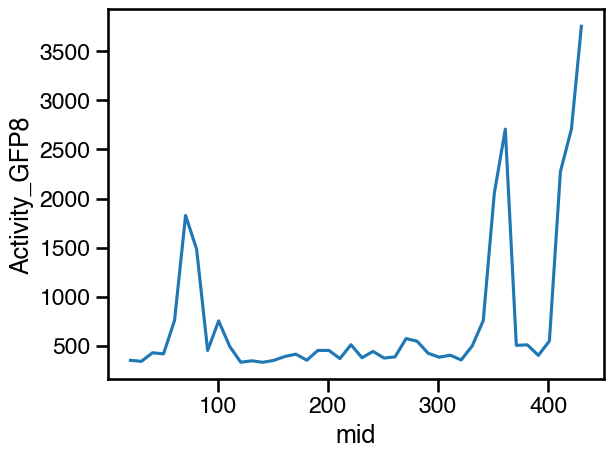

In [269]:
sns.lineplot(data = basic_sort2_vs_sort3, x = "mid", y = "Activity_GFP8")
#Matches what jordan saw!

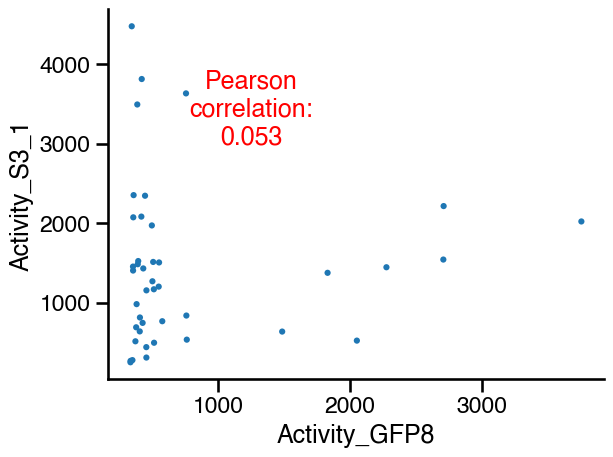

In [270]:
plot_correl("Activity_GFP8", "Activity_S3_1", basic_sort2_vs_sort3, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

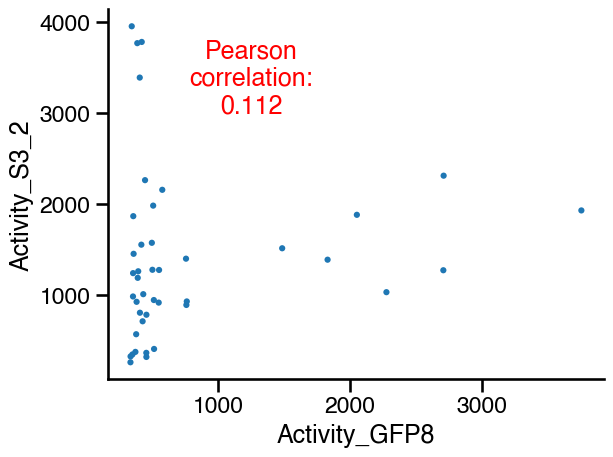

In [271]:
plot_correl("Activity_GFP8", "Activity_S3_2", basic_sort2_vs_sort3, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

In [244]:
sort2_ec_sort3_overlap = pd.merge(ec_activities, sort2, on = "AAseq", suffixes = ("_s2", "_s3"))
sort2_ec_sort3_overlap

ArrayDNA  Activity_S3_1  \
0    AAAGATAGAGATAATGAGAATCAAGGTGAAGAAGATCCAACTTGGT...     526.819049   
1    AAAGATAGAGATAATGAGAATCAAGGTGAAGAAGATCCAACTTGGT...     526.819049   
2    AAAGATAGAGATAATGAGAATCAAGGTGAAGAAGATCCAACTTGGT...     526.819049   
3    AAAGATAGAGATAATGAGAATCAAGGTGAAGAAGATCCAACTTGGT...     526.819049   
4    AAAGATAGAGATAATGAGAATCAAGGTGAAGAAGATCCAACTTGGT...     526.819049   
..                                                 ...            ...   
189  TTGGAACATGGTTTGGAGAATGGTGCTAAAGAAATGTTGGATGATA...    1272.738581   
190  TTGGAACATGGTTTGGAGAATGGTGCTAAAGAAATGTTGGATGATA...    1272.738581   
191  TTGGAACATGGTTTGGAGAATGGTGCTAAAGAAATGTTGGATGATA...    1272.738581   
192  TTGGAACATGGTTTGGAGAATGGTGCTAAAGAAATGTTGGATGATA...    1272.738581   
193  TTGTCTGGTTTGTCTTCTCATCCATTTATTGATGAATTTATTCCAA...    3635.249963   

     Activity_S3_2  reads_S3_1  reads_S3_2  \
0      1884.956669     55641.0      1291.0   
1      1884.956669     55641.0      1291.0   
2      1884.956669     55641.0      1291.0   
3      1884.956669     55641.0      1291.0   
4      1884.956669     55641.0      1291.0   
..             ...         ...         ...   
189    1281.496172     21232.0     22407.0   
190    1281.496172     21232.0     22407.0   
191    1281.496172     21232.0     22407.0   
192    1281.496172     21232.0     22407.0   
193    1403.352788      1041.0       279.0   

                                        AAseq     lib2_avg     lib2_std  \
0    KDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1205.887859   960.348320   
1    KDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1205.887859   960.348320   
2    KDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1205.887859   960.348320   
3    KDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1205.887859   960.348320   
4    KDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL  1205.887859   960.348320   
..                                        ...          ...          ...   
189  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS  1277.117377     6.192552   
190  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS  1277.117377     6.192552   
191  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS  1277.117377     6.192552   
192  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS  1277.117377     6.192552   
193  LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV  2519.301376  1578.189628   

     Activity_GFP4  Activity_GFP8  
0       860.220874    2050.765055  
1       860.220874    2050.765055  
2       860.220874    2050.765055  
3       860.220874    2050.765055  
4       860.220874    2050.765055  
..             ...            ...  
189     173.553098     498.425378  
190     173.553098     498.425378  
191     173.553098     498.425378  
192     173.553098     498.425378  
193     195.947362     753.417479  

[194 rows x 10 columns]

<Figure size 5760x4320 with 0 Axes>

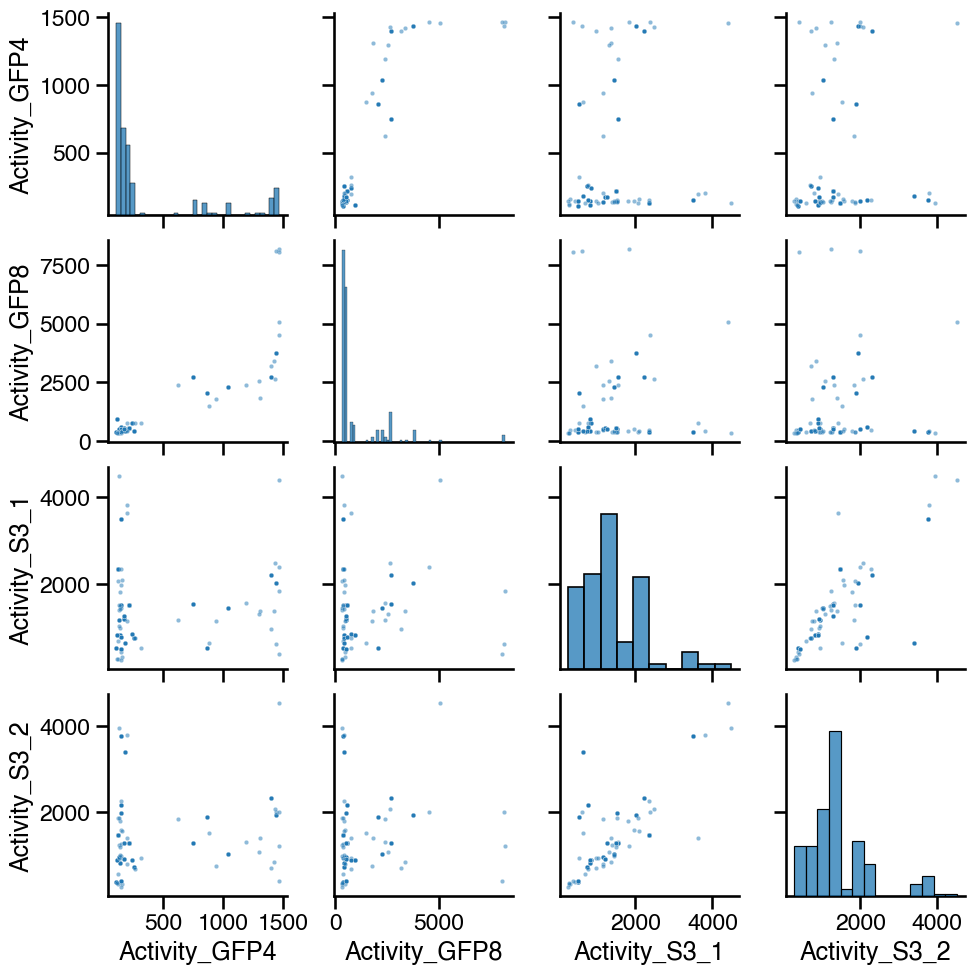

In [335]:
plt.figure(dpi = 900)
sns.pairplot(sort2_ec_sort3_overlap[["Activity_GFP4", "Activity_GFP8", "Activity_S3_1", "Activity_S3_2"]], plot_kws = {"s" : 10, "alpha" : 0.5})

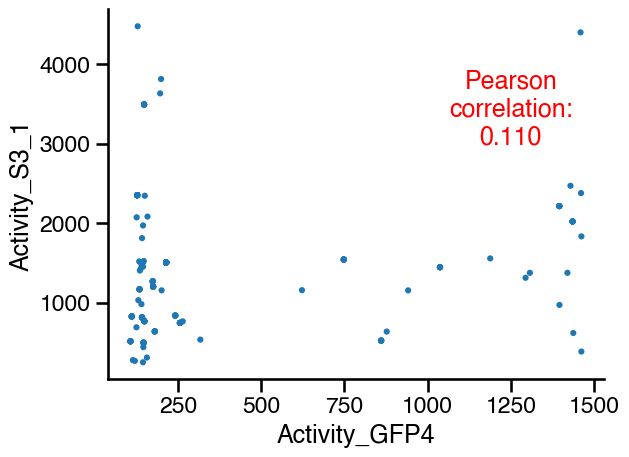

In [261]:
plot_correl("Activity_GFP4", "Activity_S3_1", sort2_ec_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

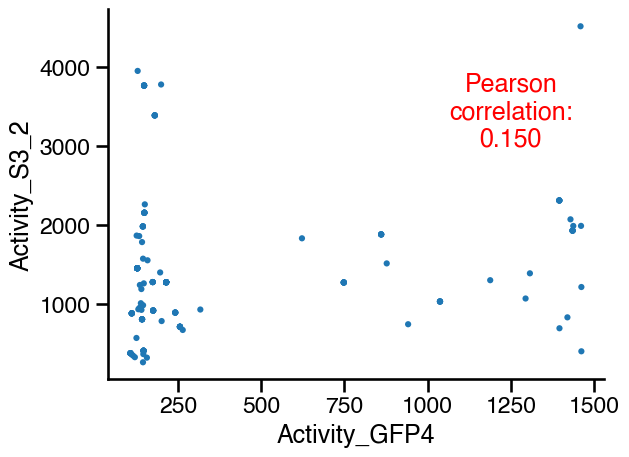

In [262]:
plot_correl("Activity_GFP4", "Activity_S3_2", sort2_ec_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

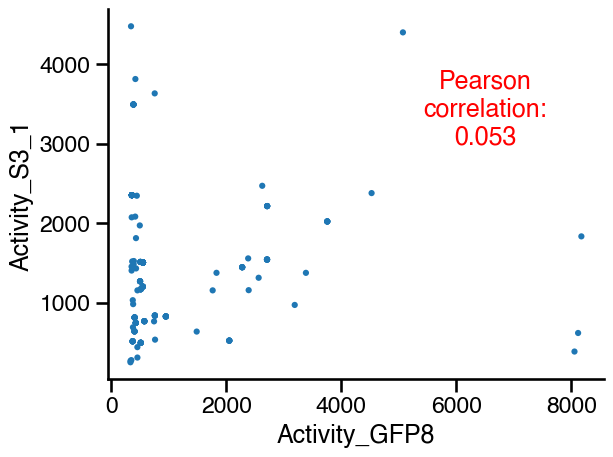

In [273]:
plot_correl("Activity_GFP8", "Activity_S3_1", sort2_ec_sort3_overlap, alpha =1 , s = 20, text_x = 6500, text_y = 3000)

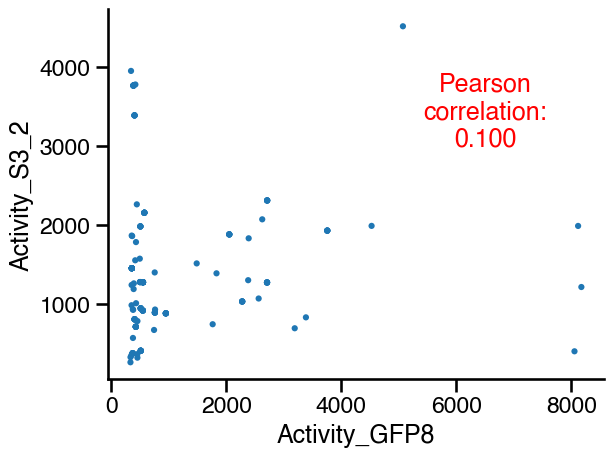

In [274]:
plot_correl("Activity_GFP8", "Activity_S3_2", sort2_ec_sort3_overlap, alpha =1 , s = 20, text_x = 6500, text_y = 3000)

In [278]:
library_sort_2 = pd.merge(library, sort2, left_on = "ProteinSeq", right_on = "AAseq").drop_duplicates()
library_sort_2

ProteinSeq  \
0     STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF   
1     STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK   
2     STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK   
3     PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI   
4     DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP   
...                                        ...   
1841  EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN   
1847  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN   
1854  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN   
1861  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN   
1868  EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN   

                          Description              Other  \
0                               AD1_0         GAL4_AD1_0   
1                            CAAD40_0      GCN4_CAAD40_0   
2                        CAAD40_7As_0  GCN4_CAAD40_7As_0   
3                             Cterm_0       War1_Cterm_0   
4                               alt_0          GCN4alt_0   
...                               ...                ...   
1841    35_PSvsCHA_DD35_S372_PShDbg.1                NaN   
1847    35_PSvsCHA_DD35_S372_PShDbg.2                NaN   
1854    35_PSvsCHA_DD35_S372_PShDbg.3                NaN   
1861  35_PSvsCHA_DD35_S372_PShDbg.111                NaN   
1868    35_PSvsCHA_DD35_S372_PShEbg.1                NaN   

                                         AAseq  Activity_GFP4  Activity_GFP8  
0     STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF    1459.479593    5071.236824  
1     STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK    1396.157808    3188.980214  
2     STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK     132.973246     361.430211  
3     PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI    1462.000000    8175.449534  
4     DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP    1462.000000    8055.707854  
...                                        ...            ...            ...  
1841  EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN     747.873344    2707.339022  
1847  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN    1461.113539    7749.057090  
1854  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN    1461.113539    7749.057090  
1861  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN    1461.113539    7749.057090  
1868  EDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN     747.873344    2707.339022  

[665 rows x 6 columns]

In [305]:
library_sort_2["Description"].str.split("_").str[1].value_counts()

Description
PSv        126
HFB         74
PSh         60
PSvsCHA     28
PSbb        24
PSd         15
CHA         14
0            6
PSsubst      4
LOW          3
PsV          2
7As          1
WT           1
Name: count, dtype: int64

In [284]:
PSv_conf2fA_STYA = sog1_helpers.return_activities("PSv_conf2fA_STYA")
PSv_conf2fA_STYA

Description Other  Start  mid  End  \
0    7_PSv_conf2fA_STYA   NaN     61   81  101   
1    8_PSv_conf2fA_STYA   NaN     71   91  111   
2    9_PSv_conf2fA_STYA   NaN     81  101  121   
3   10_PSv_conf2fA_STYA   NaN     91  111  131   
4   21_PSv_conf2fA_STYA   NaN    201  221  241   
5   22_PSv_conf2fA_STYA   NaN    211  231  251   
6   23_PSv_conf2fA_STYA   NaN    221  241  261   
7   24_PSv_conf2fA_STYA   NaN    231  251  271   
8   25_PSv_conf2fA_STYA   NaN    241  261  281   
9   32_PSv_conf2fA_STYA   NaN    311  331  351   
10  33_PSv_conf2fA_STYA   NaN    321  341  361   
11  34_PSv_conf2fA_STYA   NaN    331  351  371   
12  35_PSv_conf2fA_STYA   NaN    341  361  381   
13  36_PSv_conf2fA_STYA   NaN    351  371  391   
14  37_PSv_conf2fA_STYA   NaN    361  381  401   
15  38_PSv_conf2fA_STYA   NaN    371  391  411   
16  40_PSv_conf2fA_STYA   NaN    391  411  431   
17  41_PSv_conf2fA_STYA   NaN    401  421  441   
18  42_PSv_conf2fA_STYA   NaN    410  430  450   

                                        tile  Activity_S3_1  Activity_S3_2  \
0   GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD     589.233964     567.661610   
1   IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN    2073.520699    2127.003654   
2   LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV    1469.859938    1112.678850   
3   DEFIPAVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA    2016.437518    1159.883146   
4   GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVAPTA    2506.268941    2002.619268   
5   QQPQQLVVKRGDKAEQEVSEDIFAAVAPTADPVAPKLAAP    3424.426298    3241.749707   
6   GDKAEQEVSEDIFAAVAPTADPVAPKLAAPEPRNAVRICS    1388.705299     942.209124   
7   DIFAAVAPTADPVAPKLAAPEPRNAVRICSDSHIASDYVT     626.422487     749.661133   
8   DPVAPKLAAPEPRNAVRICSDSHIASDYVTPSDYVSAHEV    1727.531800    1233.415453   
9   LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA            NaN            NaN   
10  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV            NaN            NaN   
11  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL            NaN            NaN   
12  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN     830.835338     885.595129   
13  QFILNAQQLVEALSLCDDLLGAQDREENTNSGSLKDKQPC            NaN            NaN   
14  EALSLCDDLLGAQDREENTNSGSLKDKQPCIADYAHLGPE            NaN            NaN   
15  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ            NaN            NaN   
16  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA            NaN            NaN   
17  DFKRDLEECQKIVLDPSNIELDAPPEFRLAQLEFGAQDSF            NaN            NaN   
18  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD            NaN            NaN   

       lib2_avg  
0    578.447787  
1   2100.262176  
2   1291.269394  
3   1588.160332  
4   2254.444104  
5   3333.088003  
6   1165.457211  
7    688.041810  
8   1480.473626  
9           NaN  
10          NaN  
11          NaN  
12   858.215234  
13          NaN  
14          NaN  
15          NaN  
16          NaN  
17          NaN  
18          NaN

In [286]:
sort2_PSv_conf2fA_STYA = library_sort_2[library_sort_2["Description"].str.contains("PSv_conf2fA_STYA")]
sort2_PSv_conf2fA_STYA

ProteinSeq          Description Other  \
547  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA  32_PSv_conf2fA_STYA   NaN   
556  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV  33_PSv_conf2fA_STYA   NaN   
562  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL  34_PSv_conf2fA_STYA   NaN   
568  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN  35_PSv_conf2fA_STYA   NaN   
575  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ  38_PSv_conf2fA_STYA   NaN   
584  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA  40_PSv_conf2fA_STYA   NaN   
590  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD  42_PSv_conf2fA_STYA   NaN   

                                        AAseq  Activity_GFP4  Activity_GFP8  
547  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA     152.565384     397.343096  
556  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV     265.560948     914.784601  
562  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL     232.184778     692.427971  
568  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN     110.556780     947.091660  
575  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ     160.386247     423.508314  
584  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA     883.873434    1611.432773  
590  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD    1383.172936    2765.424764

In [290]:
PSv_conf2fD = sog1_helpers.return_activities("PSv_conf2fD")
PSv_conf2fD

Description      Other  Start  mid  End  \
0     7_PSv_conf2fD         /      61   81  101   
1     8_PSv_conf2fD          /     71   91  111   
2     9_PSv_conf2fD         /      81  101  121   
3    10_PSv_conf2fD          /     91  111  131   
4    21_PSv_conf2fD         /     201  221  241   
5    22_PSv_conf2fD          /    211  231  251   
6    23_PSv_conf2fD         /     221  241  261   
7    24_PSv_conf2fD          /    231  251  271   
8    25_PSv_conf2fD         /     241  261  281   
9    32_PSv_conf2fD          /    311  331  351   
10   33_PSv_conf2fD         /     321  341  361   
11   34_PSv_conf2fD         /     331  351  371   
12   35_PSv_conf2fD          /    341  361  381   
13   36_PSv_conf2fD         /     351  371  391   
14   37_PSv_conf2fD          /    361  381  401   
15   38_PSv_conf2fD         /     371  391  411   
16   40_PSv_conf2fD         /     391  411  431   
17   41_PSv_conf2fD          /    401  421  441   
18   42_PSv_conf2fD         /     410  430  450   
19   7_PSv_conf2fDD         /      61   81  101   
20   8_PSv_conf2fDD          /     71   91  111   
21   9_PSv_conf2fDD         /      81  101  121   
22  10_PSv_conf2fDD          /     91  111  131   
23  21_PSv_conf2fDD         /     201  221  241   
24  22_PSv_conf2fDD          /    211  231  251   
25  23_PSv_conf2fDD         /     221  241  261   
26  24_PSv_conf2fDD          /    231  251  271   
27  25_PSv_conf2fDD         /     241  261  281   
28  32_PSv_conf2fDD          /    311  331  351   
29  33_PSv_conf2fDD         /     321  341  361   
30  34_PSv_conf2fDD         /     331  351  371   
31  35_PSv_conf2fDD          /    341  361  381   
32  36_PSv_conf2fDD         /     351  371  391   
33  37_PSv_conf2fDD          /    361  381  401   
34  38_PSv_conf2fDD         /     371  391  411   
35  40_PSv_conf2fDD  Pro subst    391  411  431   
36  41_PSv_conf2fDD  Pro subst    401  421  441   
37  42_PSv_conf2fDD  Pro subst    410  430  450   

                                        tile  Activity_S3_1  Activity_S3_2  \
0   GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD     612.310337     525.559638   
1   IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN    1330.105073     964.886411   
2   LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV    3366.486424    3734.635082   
3   DEFIPDVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA    1617.016395    1028.150576   
4   GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVDPTA     534.506033     788.330165   
5   QQPQQLVVKRGDKAEQEVSEDIFAAVDPTADPVDPKLADP    1668.444047    1244.981802   
6   GDKAEQEVSEDIFAAVDPTADPVDPKLADPEPRNAVRICS    2732.816163    2570.852747   
7   DIFAAVDPTADPVDPKLADPEPRNAVRICSDSHIASDYVT    1247.551307    1219.135527   
8   DPVDPKLADPEPRNAVRICSDSHIASDYVTPSDYVSAHEV    1893.155849    1347.526513   
9   LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD            NaN            NaN   
10  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV            NaN            NaN   
11  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL            NaN            NaN   
12  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN            NaN            NaN   
13  QFILNDQQLVEALSLCDDLLGDQDREENTNSGSLKDKQPC            NaN            NaN   
14  EALSLCDDLLGDQDREENTNSGSLKDKQPCIADYAHLGPE            NaN            NaN   
15  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ            NaN            NaN   
16  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD            NaN            NaN   
17  DFKRDLEECQKIVLDPSNIELDDPPEFRLDQLEFGDQDSF            NaN            NaN   
18  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD            NaN            NaN   
19  GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDDNQD    1213.778538    1064.822931   
20  IIWHLLAKSGLSGLSSHPFIDEFIPDDNQDDGICYTHPKN     653.006533     591.547457   
21  LSGLSSHPFIDEFIPDDNQDDGICYTHPKNLPGVKSDGTV     855.619915     680.028911   
22  DEFIPDDNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA     786.568236     380.067965   
23  GDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAADDPTA    2059.211553    1934.562656   
24  QQPQQLVVKRGDKAEQEVSEDIFAADDPTADPDDPKLDDP     514.832432     498.

In [291]:
sort2_PSv_conf2fD = library_sort_2[library_sort_2["Description"].str.contains("PSv_conf2fD")]
sort2_PSv_conf2fD

ProteinSeq     Description Other  \
762  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD  32_PSv_conf2fD     /   
771  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV  33_PSv_conf2fD    /    
777  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL  34_PSv_conf2fD    /    
783  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN  35_PSv_conf2fD     /   
790  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ  38_PSv_conf2fD    /    
799  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD  40_PSv_conf2fD    /    
805  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD  42_PSv_conf2fD    /    

                                        AAseq  Activity_GFP4  Activity_GFP8  
762  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD     135.671157     419.602126  
771  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV     329.666908     908.952754  
777  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL    1451.313618    7995.935881  
783  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN    1461.113539    7749.057090  
790  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ     125.606347     414.538730  
799  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD     990.404175    2132.907678  
805  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD    1458.478442    7168.293183

In [287]:
pd.merge(PSv_conf2fA_STYA, sort2_PSv_conf2fA_STYA)

Description Other  Start  mid  End  \
0  32_PSv_conf2fA_STYA   NaN    311  331  351   
1  33_PSv_conf2fA_STYA   NaN    321  341  361   
2  34_PSv_conf2fA_STYA   NaN    331  351  371   
3  35_PSv_conf2fA_STYA   NaN    341  361  381   
4  38_PSv_conf2fA_STYA   NaN    371  391  411   
5  40_PSv_conf2fA_STYA   NaN    391  411  431   
6  42_PSv_conf2fA_STYA   NaN    410  430  450   

                                       tile  Activity_S3_1  Activity_S3_2  \
0  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA            NaN            NaN   
1  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV            NaN            NaN   
2  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL            NaN            NaN   
3  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN     830.835338     885.595129   
4  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ            NaN            NaN   
5  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA            NaN            NaN   
6  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD            NaN            NaN   

     lib2_avg                                ProteinSeq  \
0         NaN  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA   
1         NaN  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV   
2         NaN  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL   
3  858.215234  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN   
4         NaN  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ   
5         NaN  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA   
6         NaN  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD   

                                      AAseq  Activity_GFP4  Activity_GFP8  
0  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGA     152.565384     397.343096  
1  EMLDDKEEQEKDRDNENQGEEDPTWFDSGAQFILNAQQLV     265.560948     914.784601  
2  KDRDNENQGEEDPTWFDSGAQFILNAQQLVEALSLCDDLL     232.184778     692.427971  
3  EDPTWFDSGAQFILNAQQLVEALSLCDDLLGAQDREENTN     110.556780     947.091660  
4  GAQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ     160.386247     423.508314  
5  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDAPPEFRLA     883.873434    1611.432773  
6  QKIVLDPSNIELDAPPEFRLAQLEFGAQDSFLAWGTGKTD    1383.172936    2765.424764

In [293]:
pd.merge(PSv_conf2fD, sort2_PSv_conf2fD)

Description Other  Start  mid  End  \
0  32_PSv_conf2fD     /    311  331  351   
1  33_PSv_conf2fD    /     321  341  361   
2  34_PSv_conf2fD    /     331  351  371   
3  35_PSv_conf2fD     /    341  361  381   
4  38_PSv_conf2fD    /     371  391  411   
5  40_PSv_conf2fD    /     391  411  431   
6  42_PSv_conf2fD    /     410  430  450   

                                       tile  Activity_S3_1  Activity_S3_2  \
0  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD            NaN            NaN   
1  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV            NaN            NaN   
2  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL            NaN            NaN   
3  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN            NaN            NaN   
4  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ            NaN            NaN   
5  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD            NaN            NaN   
6  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD            NaN            NaN   

   lib2_avg                                ProteinSeq  \
0       NaN  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD   
1       NaN  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV   
2       NaN  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL   
3       NaN  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN   
4       NaN  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ   
5       NaN  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD   
6       NaN  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD   

                                      AAseq  Activity_GFP4  Activity_GFP8  
0  LEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGD     135.671157     419.602126  
1  EMLDDKEEQEKDRDNENQGEEDPTWFDSGDQFILNDQQLV     329.666908     908.952754  
2  KDRDNENQGEEDPTWFDSGDQFILNDQQLVEALSLCDDLL    1451.313618    7995.935881  
3  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGDQDREENTN    1461.113539    7749.057090  
4  GDQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ     125.606347     414.538730  
5  IADYAHLGPEDFKRDLEECQKIVLDPSNIELDDPPEFRLD     990.404175    2132.907678  
6  QKIVLDPSNIELDDPPEFRLDQLEFGDQDSFLAWGTGKTD    1458.478442    7168.293183

<Axes: xlabel='mid', ylabel='Activity_GFP8'>

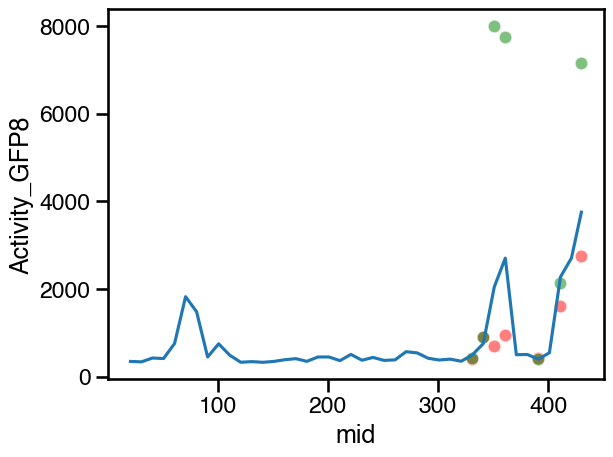

In [303]:
sns.lineplot(data = basic_sort2_vs_sort3, x = "mid", y = "Activity_GFP8")
sns.scatterplot(data = pd.merge(PSv_conf2fA_STYA, sort2_PSv_conf2fA_STYA), x = "mid", y = "Activity_GFP8", color = "red", alpha = 0.5)
sns.scatterplot(data = pd.merge(PSv_conf2fD, sort2_PSv_conf2fD), x = "mid", y = "Activity_GFP8", color = "green", alpha = 0.5)

In [306]:
sort2_js_sort3_overlap = pd.merge(js_activities, sort2, on = "AAseq", suffixes = ("_s2", "_s3"))
sort2_js_sort3_overlap

ArrayDNA  Activity_GFP8_s2  \
0     GAAGATCCAACTTGGTTTGATTCTGGTTCTCAATTTATCTTAAATT...        636.156202   
1     GAAGCTTTGTCTTTGTGTGATGATTTGTTGGGTGATCAAGATAGAG...        602.696194   
2     GATTTGGCTGAAGATGATGAAGTTATGTGTATGGAAGATGAAGTTC...        381.502348   
3     GGTCAAAGGAAGAGAAGGAAGATTACTCCAACTTTGGTTAATGATG...        347.155741   
4     TCTGAATTGACTTCTACTTTGGGTATTTCTCATAGATTGCCACAAT...        437.694050   
...                                                 ...               ...   
1705  GAAGATCCAACTTGGTTTGATTCTGGTGATCAATTTATCTTGAATG...       7960.852191   
1706  GAAGATCCAACTTGGTTTGATTCTGGTGATCAATTTATCTTGAATG...       7960.852191   
1707  GAAGATCCAACTTGGTTTGATTCTGGTGATCAAGCTATTGCTAATG...       2769.615372   
1708  GAAGATCCAACTGCTGATGCTGCTATTCAACAATTGTGGAATCAAG...       5603.789064   
1709  GAAGATCCAACTTGGTTCTCTTTGGGTCAAGTTAATCAAGCTGATG...       3894.484062   

      Activity_S3_1  Activity_S3_2  reads_S3_1  reads_S3_2  \
0        614.613867     944.856101      6448.0       115.0   
1        541.936177     992.565641     10829.0      1680.0   
2        390.255889     390.758385     91062.0       892.0   
3        430.848450     865.176167     13900.0       140.0   
4        470.823534    3562.821795     10128.0       246.0   
...             ...            ...         ...         ...   
1705    5308.586517    1810.174287      4804.0        18.0   
1706    5308.586517    1810.174287      4804.0        18.0   
1707    2264.103416     355.344665      3121.0        57.0   
1708     237.000000            NaN        17.0         NaN   
1709            NaN            NaN         NaN         NaN   

                                         AAseq     lib2_avg     lib2_std  \
0     EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN   779.734984   233.516523   
1     EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE   767.250909   318.643150   
2     DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK   390.507137     0.355319   
3     GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK   648.012309   307.116074   
4     SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL  2016.822664  2186.372938   
...                                        ...          ...          ...   
1705  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN  3559.380402  2473.751011   
1706  EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN  3559.380402  2473.751011   
1707  EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN  1309.724041  1349.696256   
1708  EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN   237.000000          NaN   
1709  EDPTWFSLGQVNQADEFIALQALSLCDDLLGAQDREENTN          NaN          NaN   

      Activity_GFP4  Activity_GFP8_s3  
0        183.082210        636.156202  
1        165.429679        602.696194  
2        139.428825        381.502348  
3        127.998377        347.155741  
4        141.237171        437.694050  
...             ...               ...  
1705    1462.000000       7960.852191  
1706    1462.000000       7960.852191  
1707    1462.000000       2769.615372  
1708    1462.000000       5603.789064  
1709            NaN       3894.484062  

[1710 rows x 11 columns]

In [322]:
js_activities["Activity_S3_1"].isna().sum()

295

In [320]:
js_activities["Activity_GFP8"].isna().sum()

9197

<Figure size 5760x4320 with 0 Axes>

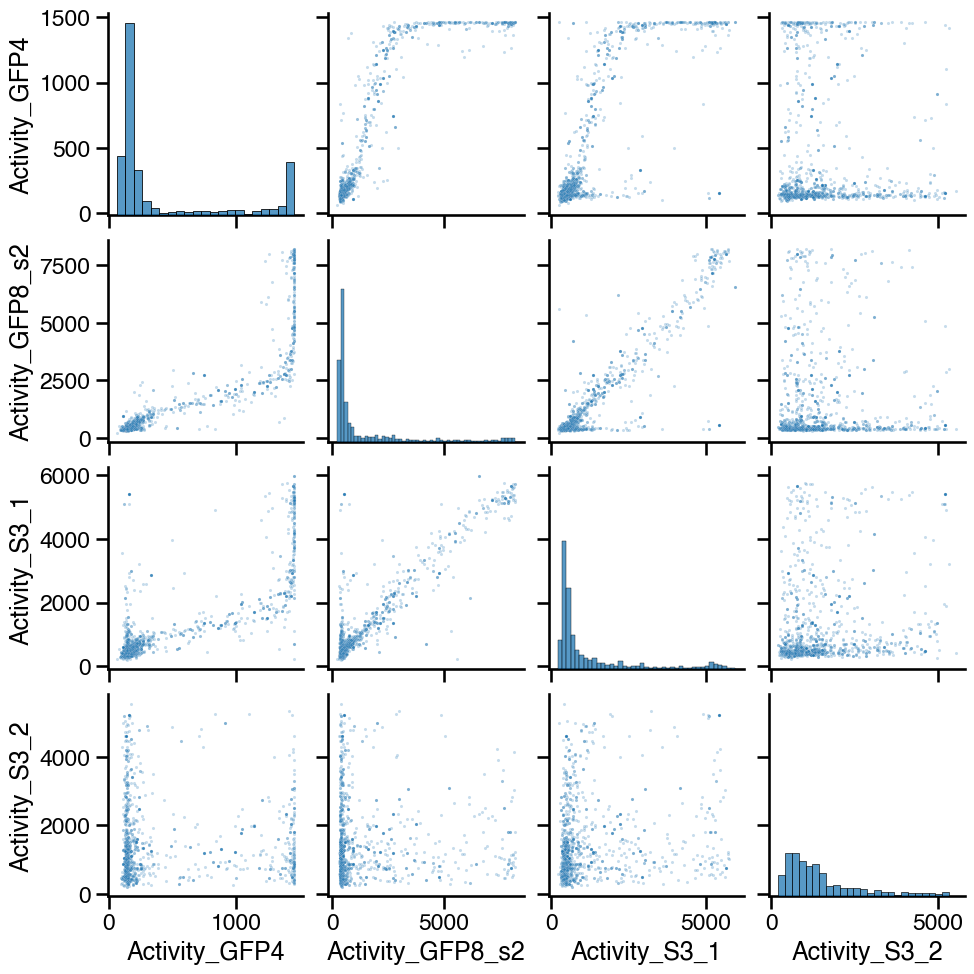

In [330]:
plt.figure(dpi = 900)
sns.pairplot(sort2_js_sort3_overlap[["Activity_GFP4", "Activity_GFP8_s2", "Activity_S3_1", "Activity_S3_2"]], plot_kws = {"s" : 5, "alpha" : 0.25})

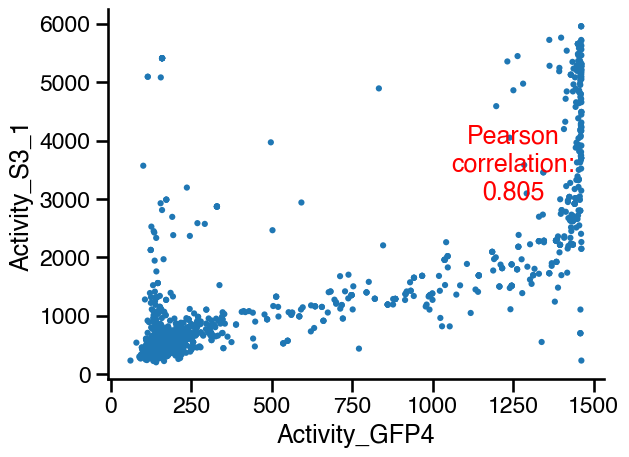

In [323]:
plot_correl("Activity_GFP4", "Activity_S3_1", sort2_js_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

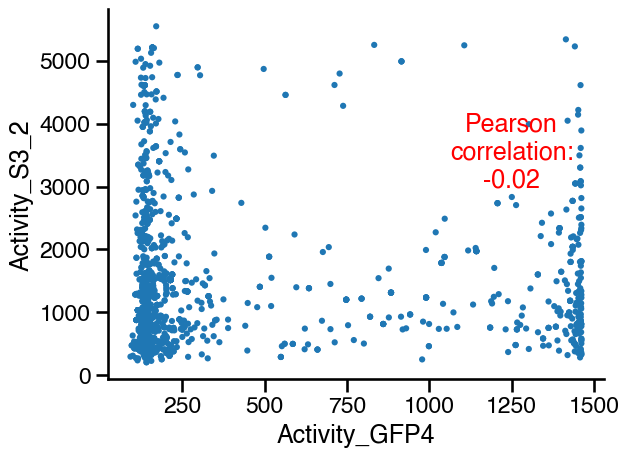

In [324]:
plot_correl("Activity_GFP4", "Activity_S3_2", sort2_js_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

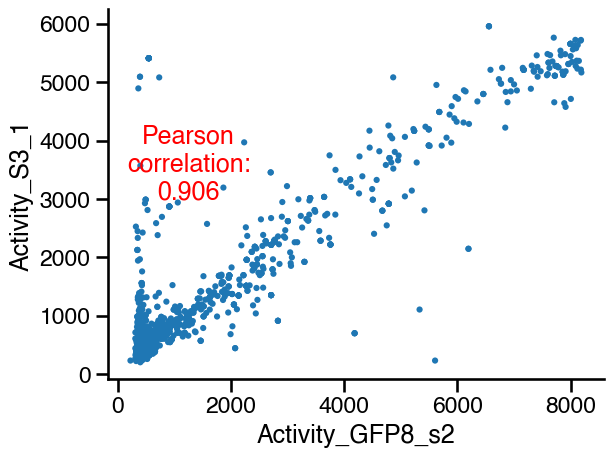

In [325]:
plot_correl("Activity_GFP8_s2", "Activity_S3_1", sort2_js_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)

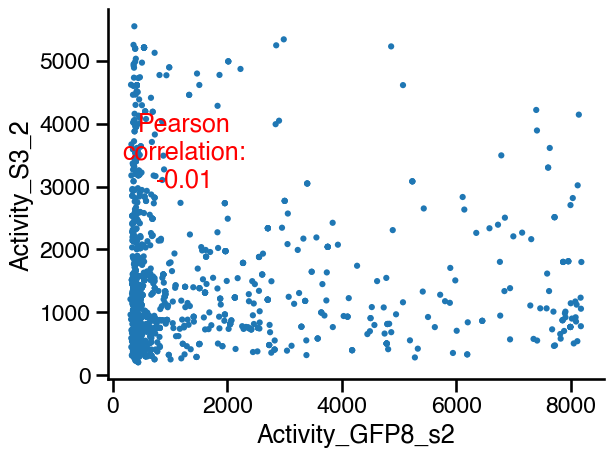

In [326]:
plot_correl("Activity_GFP8_s2", "Activity_S3_2", sort2_js_sort3_overlap, alpha =1 , s = 20, text_x = 1250, text_y = 3000)